In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Bank Marketing Campaign Analysis and Prediction**


## 📌 Objective

This project aims to improve the effectiveness and efficiency of direct marketing campaigns conducted by a Portuguese bank while maintaining the numbers of leads to contact. These campaigns focus on promoting term deposit subscriptions via phone calls.

The primary business goal is to:

- Identify clients most likely to subscribe to term deposits.
- Predict responses using machine learning.
- Maximize marketing effort by reducing unnecessary contact costs and focusing efforts on high-conversion prospects.

## 📊 Dataset Overview

The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset), contains information about:
- Client demographics (age, job, marital status, etc.)
- Financial indicators (loans, housing, balance)
- Details of the marketing contact (contact type, call duration, day/month)
- Outcomes of previous marketing campaigns
- The final outcome: whether the client subscribed to a term deposit (`y`)

## 🔍 Business Questions to Answer

This analysis aims to address the following key business questions:

1. **What kinds of clients are more likely to do deposits?**
   - How do demographics, financial status, or past interactions influence decisions?

2. **How to personalize campaigns or decide whom to target?**
   - Can we use predictive modeling to identify promising leads?

3. **How to allocate marketing efforts more efficiently?**
   - When and how should the bank reach out to maximize conversions?

By combining exploratory analysis and machine learning, this project will provide valuable insights for more data-driven marketing strategies.

## **A. Data Understanding**

In [2]:
data = pd.read_csv("bank-additional-full.csv", sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.shape

(41188, 21)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
def detailed_unique_data(data):
    data_unique = pd.DataFrame({
        'Columns': data.columns,
        'Unique Count': [data[col].nunique() for col in data.columns],
        'Unique Values Example': [data[col].unique()[:10] for col in data.columns],
        'Data Type': [data[col].dtype for col in data.columns]
    })
    return data_unique


unique_data_summary = detailed_unique_data(data)
pd.set_option('display.max_colwidth', None)
display(unique_data_summary)

,Columns,Unique Count,Unique Values Example,Data Type
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29]",int64
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown]",object
2,marital,4,"[married, single, divorced, unknown]",object
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]",object
4,default,3,"[no, unknown, yes]",object
5,housing,3,"[no, yes, unknown]",object
6,loan,3,"[no, yes, unknown]",object
7,contact,2,"[telephone, cellular]",object
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]",object
9,day_of_week,5,"[mon, tue, wed, thu, fri]",object


In [7]:
print('Descriptive Stats for Numerical Feature')
display(data.describe(include='number'))

print('Descriptive Stats for Categorical Feature')
display(data.describe(include='object'))

Descriptive Stats for Numerical Feature


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Descriptive Stats for Categorical Feature


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
full_duplicates = data[data.duplicated()]
print(f"Number of fully duplicated rows: {len(full_duplicates)}")

Number of fully duplicated rows: 12


In [9]:
# Check for missing values in each column
missing_values = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentage = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

# Combine
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
display(missing_data)

,Missing Count,Missing Percentage
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


In [10]:
# Check proportion of 'unknown' values
unknown_counts = (data == 'unknown').sum()
unknown_ratio = unknown_counts / data.shape[0]
unknown_ratio[unknown_ratio > 0].sort_values(ascending=False)

default      0.208726
education    0.042027
housing      0.024036
loan         0.024036
job          0.008012
marital      0.001942
dtype: float64

In [11]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


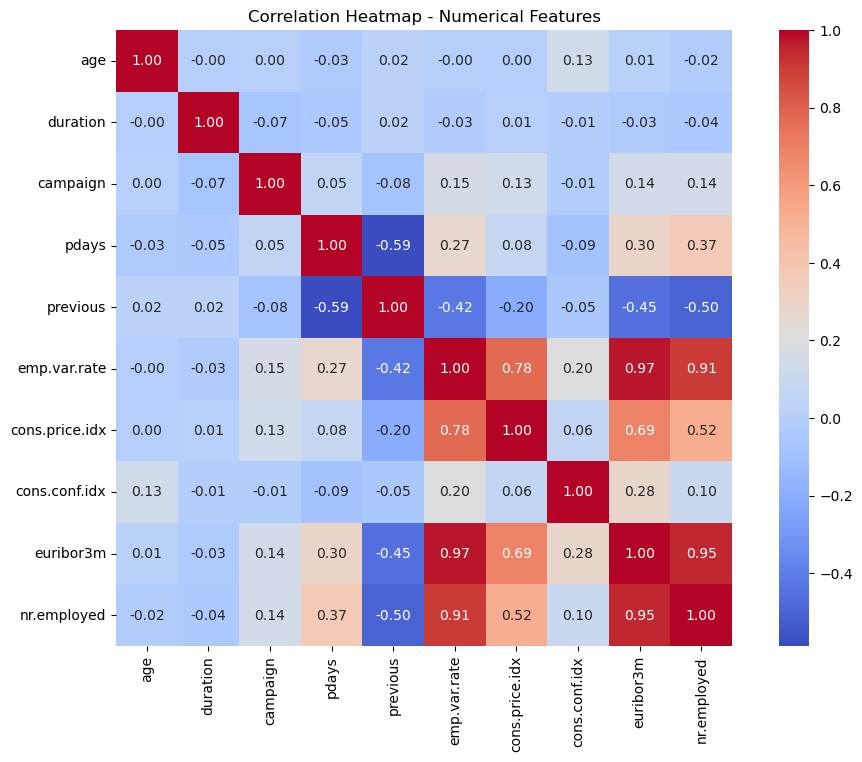

In [12]:
plt.figure(figsize=(12, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap - Numerical Features")
plt.show()

## **B. Data Cleaning**

### 1. Initialize

In [13]:
df = data.copy()

In [14]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2. Standardize Name

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df['education'] = data['education'].str.replace('.', ' ', regex=False)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 3. Handling Missing Value

In [17]:
# Replacing missing values with mode

coll = ['job', 'marital', 'education']
for i in coll:
    df[i] = df[i].replace('unknown', np.nan)
    mode_val = df[i].mode()[0]
    df[i] = df[i].fillna(mode_val)

In [18]:
# Map housing & loan to 'yes'

coll = ['housing', 'loan']
for i in coll:
    df[i] = df[i].replace('unknown','yes')

### 4. Converting Data Types

In [19]:
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome', 'y'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

### 5. Handling Duplicates

In [20]:
# Remove duplicates
df = df.drop_duplicates()

# Check for constant (zero-variance) columns
df.nunique()[df.nunique() == 1]

Series([], dtype: int64)

### 6. Grouping Data

#### *Numeric Features*

In [21]:
# Previously contacted

df[['previous', 'pdays']][(df['pdays'] == 999)& (df['previous'] == 0)]
df['previous_contacted'] = np.where(df['pdays'] == 999, 0, 1)

In [22]:
df[['previous', 'pdays']][(df['pdays'] == 999)& (df['previous'] == 0)]

,previous,pdays
0,0,999
1,0,999
2,0,999
3,0,999
4,0,999
...,...,...
41181,0,999
41183,0,999
41184,0,999
41185,0,999


In [23]:
# Age Group

age_bins = [0, 25, 35, 45, 60, df['age'].max()]
age_labels = ['Young Adults\n(Under 25)', 'Early Adults\n(23 - 35)', 'Middle Adults\n(36-45)', 'Old Adults\n(46-60)', 'Elders\n(60+)']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [24]:
# Duration

duration_bins = [0, 100, 300, 600, 1000, df['duration'].max()]
duration_labels = ['<100s', '100-300s', '300-600s', '600-1000s', '1000+s']
df['duration_group'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels)

In [25]:
df = df.dropna(subset=['duration_group'])

In [26]:
# Campaign

df['campaign_group'] = pd.cut(df['campaign'], bins=[0, 2, 4, 10, df['campaign'].max()], labels=['1-2', '3-4', '5-10', '10+'])

#### *Categorical Feature*

In [27]:
replacement_mapping = {'basic 4y': 'basic',
                       'basic 6y': 'basic',
                       'basic 9y': 'basic'}

# Use the replace method to group the categories
df['education'] = df['education'].replace(replacement_mapping)

The basic education have more or less the same in terms of conversion rate, this maybe due to they all refer to variations of basic education, and splitting them likely adds noise rather than signal.

#### *Socio-Economic Feature*

In [28]:
df['cpi_group'] = pd.qcut(df['cons.price.idx'], q=4, precision=2, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['cci_group'] = pd.qcut(df['cons.conf.idx'], q=4, precision=1, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['euribor_group'] = pd.qcut(df['euribor3m'], q=4,precision=2, labels=['Q1', 'Q2', 'Q3', 'Q4'])

### 7. Handling Outliers

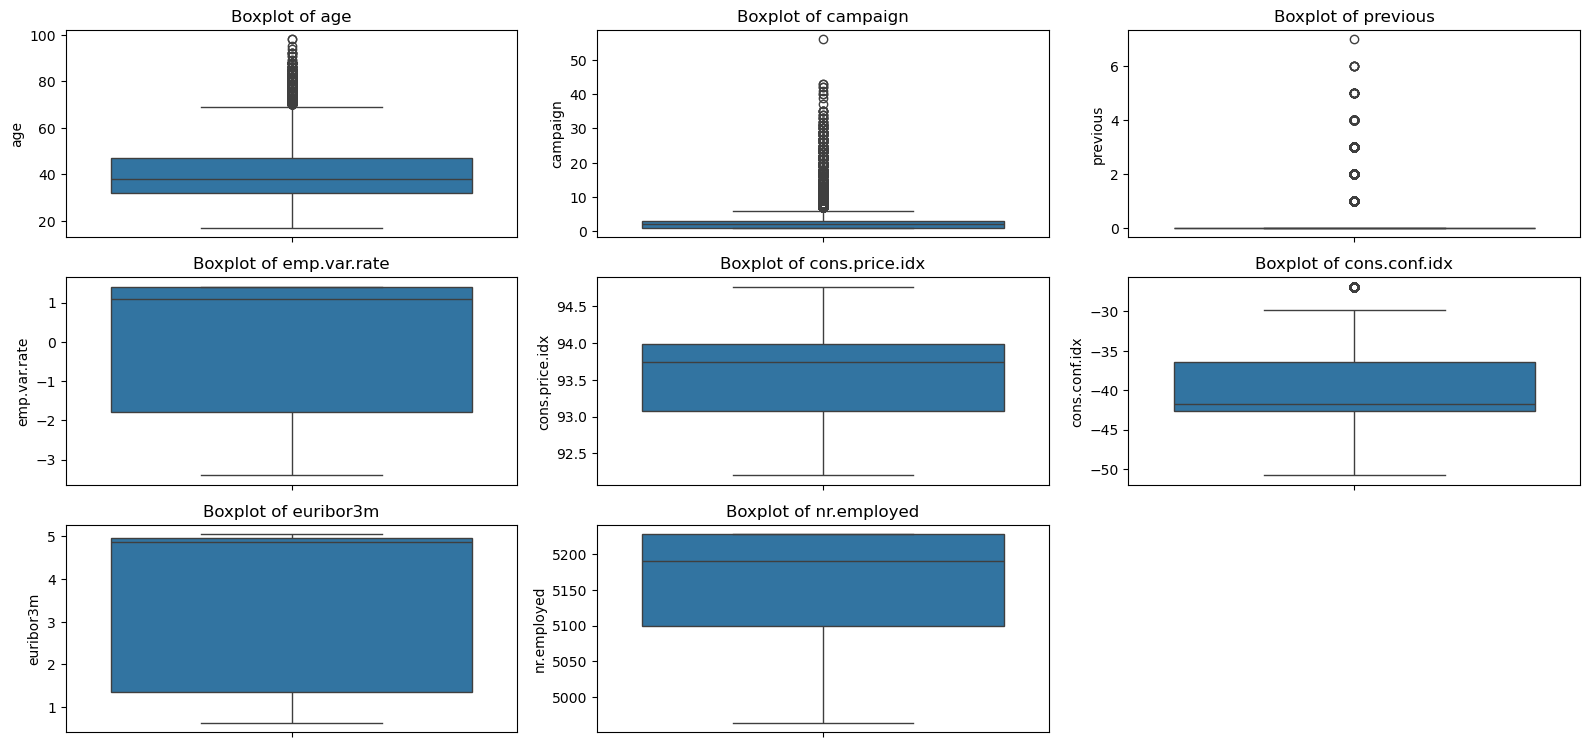

In [29]:
num_cols = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 
            'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [30]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_IQR = df[(df['age'] < lower_bound_iqr) | (df['age'] > upper_bound_iqr)]

print(f"Column: 'age', IQR_Lower: {lower_bound_iqr}, IQR_Upper: {upper_bound_iqr}, IQR_Outliers: {len(outliers_IQR)}")

Column: 'age', IQR_Lower: 9.5, IQR_Upper: 69.5, IQR_Outliers: 468


In [31]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,previous_contacted,age_group,duration_group,campaign_group,cpi_group,cci_group,euribor_group
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0,Old Adults\n(46-60),100-300s,1-2,Q3,Q3,Q2
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,no,0,Old Adults\n(46-60),100-300s,1-2,Q3,Q3,Q2
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,0,Middle Adults\n(36-45),100-300s,1-2,Q3,Q3,Q2
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0,Middle Adults\n(36-45),100-300s,1-2,Q3,Q3,Q2
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,0,Old Adults\n(46-60),300-600s,1-2,Q3,Q3,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,1.028,4963.6,yes,0,Elders\n(60+),300-600s,1-2,Q4,Q1,Q1
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,1.028,4963.6,no,0,Old Adults\n(46-60),300-600s,1-2,Q4,Q1,Q1
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,1.028,4963.6,no,0,Old Adults\n(46-60),100-300s,1-2,Q4,Q1,Q1
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,1.028,4963.6,yes,0,Middle Adults\n(36-45),300-600s,1-2,Q4,Q1,Q1


## **C. Exploratory Data Analysis**

### 1. General Analysis

In [32]:
numerical_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

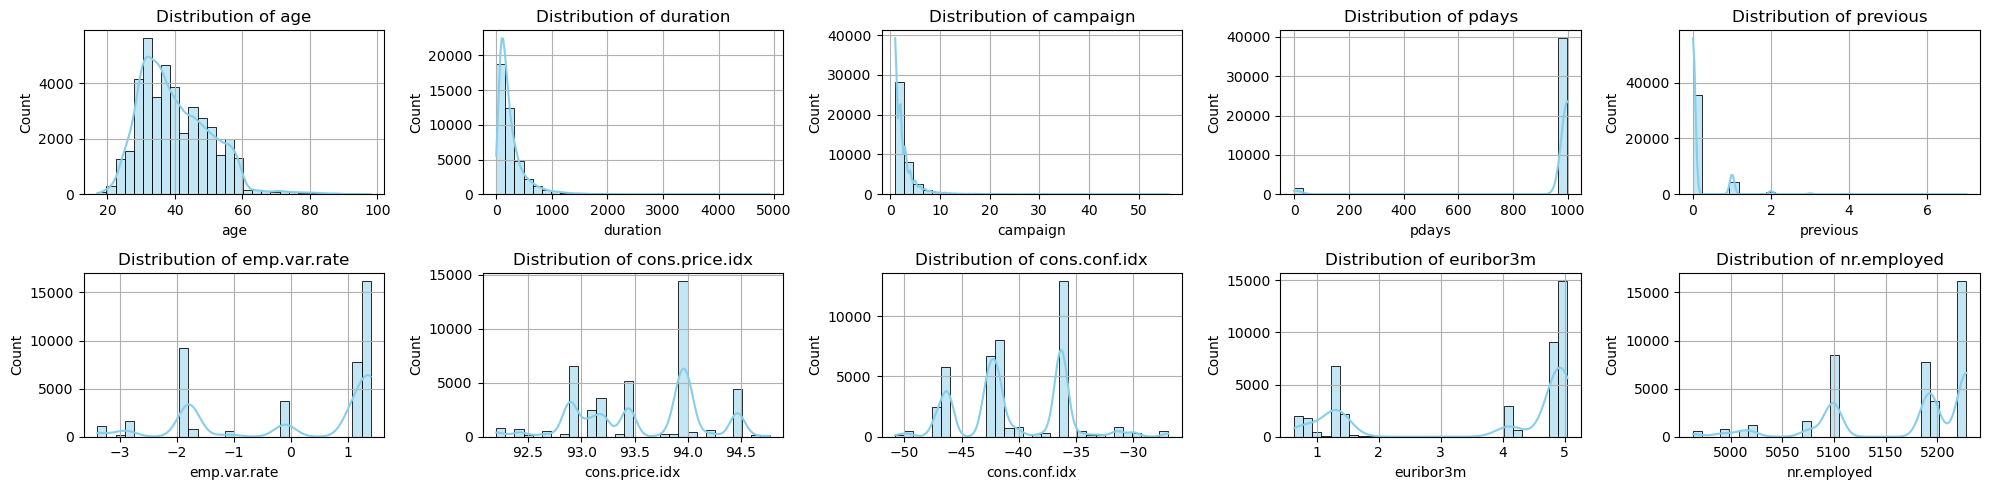

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 5))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axs[i], color='skyblue', bins=30)
    axs[i].set_title(f'Distribution of {col}', fontsize=12)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Aside from 'age' and 'duration', the numerical features in the preceding plot show irregular and scattered distributions, indicating they likely contain only a few unique values.

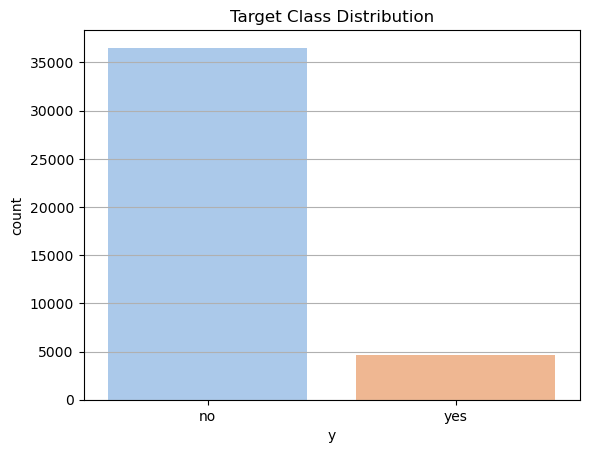

In [34]:
sns.countplot(data=df, x='y', palette='pastel')
plt.title('Target Class Distribution')
plt.grid(axis='y')
plt.show()

Summary:

Several variables such as duration, campaign, and previous show strong right skew and contain outliers. The pdays variable is mostly 999, indicating no prior contact, and has been flagged for transformation. Also, the class distribution of the target variable y shows a strong imbalance (88.4% "no", 11.6% "yes"), which needs to be considered during modeling.

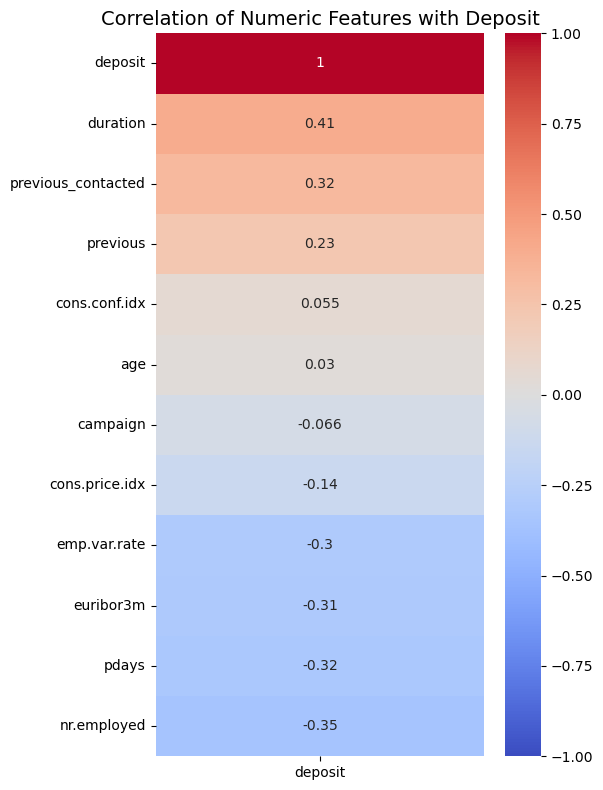

In [35]:
df=df.rename(columns={'y':'deposit'})
df['deposit']=df['deposit'].map({'yes':1,'no':0})

df['deposit']=df['deposit'].astype('int')
corr = df.corr(numeric_only=True)['deposit'].sort_values(ascending=False)

# Get numeric correlations
corr_matrix = df.corr(numeric_only=True)

# Focus only on deposit correlation
deposit_corr = corr_matrix[['deposit']].sort_values(by='deposit', ascending=False)

# Plot heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(deposit_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

plt.title('Correlation of Numeric Features with Deposit', fontsize=14)
plt.tight_layout()
plt.show()

### 2. Univariate Analysis

#### - Numerical Analysis

In [36]:
# Grouping Age Feature
age_bins = [0, 30, 40, 60, 100]
age_labels = ['Young Adults\n(17-30)', 'Middle Age\n(30-40)', 'Old Adults\n(40-60)', 'Elders\n(60+)']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Create duration bins
duration_bins = [0, 100, 300, 600, 1000, df['duration'].max()]
duration_labels = ['<100s', '100-300s', '300-600s', '600-1000s', '1000+s']
df['duration_group'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels)

# Campaign bins
df['campaign_group'] = pd.cut(df['campaign'], bins=[0, 2, 4, 10, df['campaign'].max()], labels=['1-2', '3-4', '5-10', '10+'])


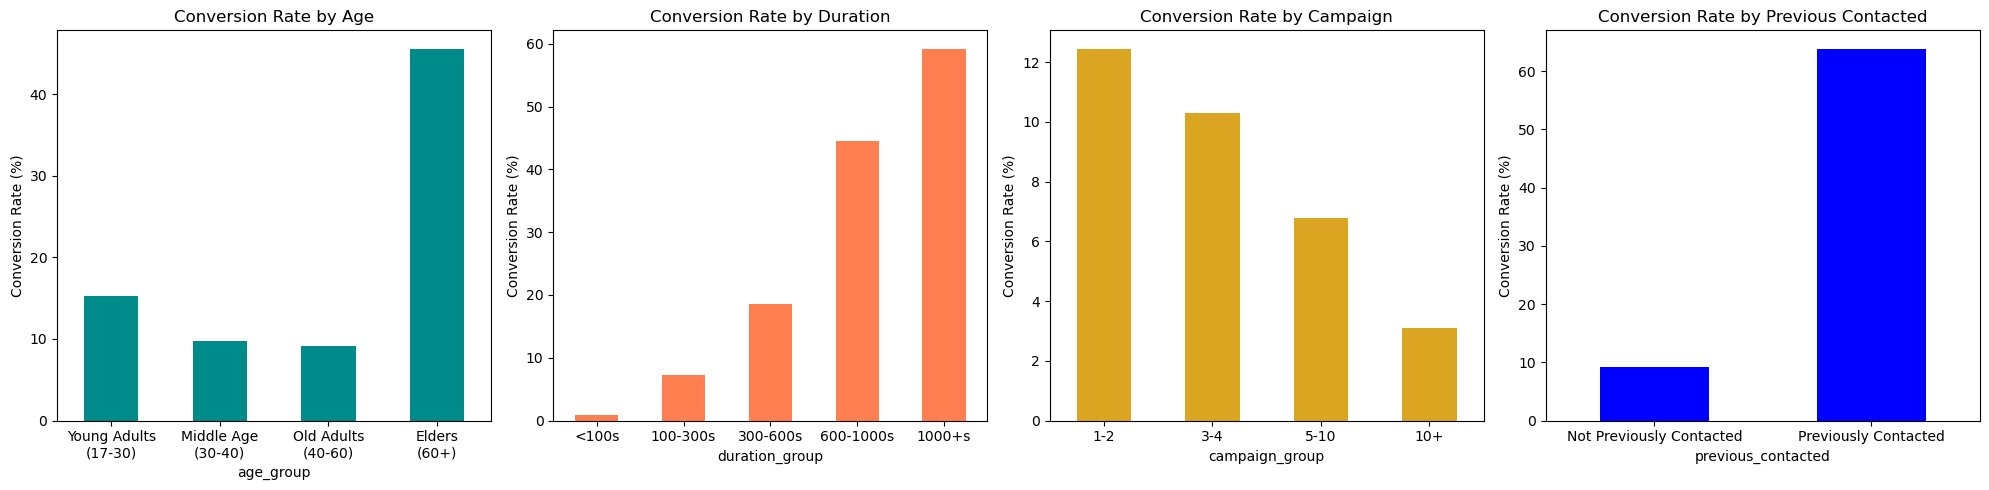

In [37]:
conver_rate_col = ['age_group', 'duration_group', 'campaign_group', 'previous_contacted']
color_bar = ['darkcyan', 'coral','goldenrod', 'blue']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axs = axs.flatten()
for i, (col, colored) in enumerate(zip(conver_rate_col, color_bar)):
    conver = df.groupby(col)['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    conver[[1]].plot(kind='bar', ax=axs[i], color=colored, legend=False)
    axs[i].set_title(f'Conversion Rate by {col.replace("_group", "").replace("_", " ").title()}')
    axs[i].tick_params(axis='x', rotation=0, labelsize=10)
    axs[i].set_ylabel('Conversion Rate (%)')
    if(col == 'previous_contacted'):
        plt.xticks(ticks=[0, 1], labels=['Not Previously Contacted', 'Previously Contacted'], rotation=0)
    
plt.tight_layout()
plt.show()

1. **Convertion Rate by Age Groups:**

    Term deposits are most popular among customers over 60, suggesting their inclination towards safe investments. Interestingly, young adults aged 18-30 also show a significant interest in these deposits, pointing to an opportunity for early investment strategies.

2. **Convertion Rate by Call Durations:**

    Analysis shows that calls with longer durations have a higher tendency to convert. This confirms that call length is a post-call metric, likely influenced by pre-existing customer interest or a positive call experience that was already leading towards conversion.

3. **Convertion Rate by Campaign:**

    It's often the case that making more customer contacts doesn't guarantee a higher conversion rate. This could be attributed to diminishing returns, implying that after a certain point, additional contacts may become less effective and potentially even counterproductive, leading to wasted resources and potentially customer fatigue.

4. **Convertion Rate by Previously Contacted or not:**

    Customers with a history of contact are more likely to give a positive response. This underscores the value of relationship building, as prior interactions can establish rapport and increase the likelihood of a favorable outcome in future engagements.


#### - Categorical Feature Analysis

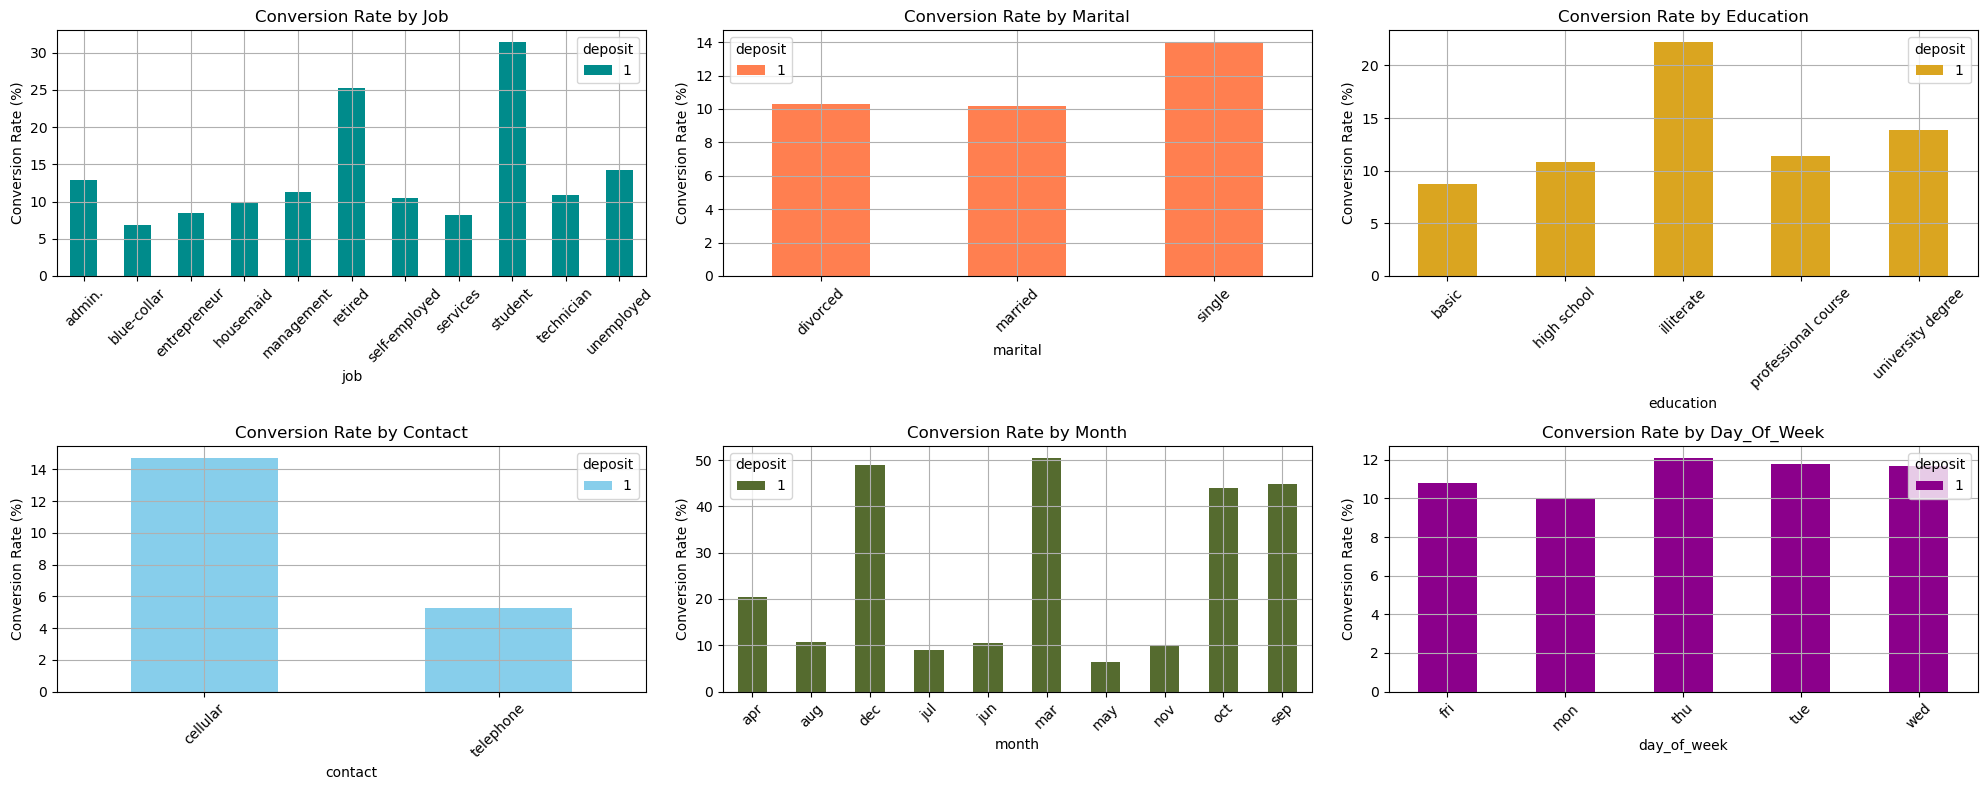

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
axs = axs.flatten()

categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week']
color_bar = ['darkcyan', 'coral','goldenrod', 'skyblue','darkolivegreen','darkmagenta']
for i, (col, colored) in enumerate(zip(categorical_features, color_bar)):
    met_conv = df.groupby(col)['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    met_conv[[1]].plot(kind='bar', ax=axs[i], color=colored)
    axs[i].set_ylabel('Conversion Rate (%)')
    axs[i].set_title(f'Conversion Rate by {col.title()}')
    axs[i].tick_params(axis='x', rotation=45, labelsize=10)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

1. **Job**: 

    "Student" has a significantly higher conversion rate compared to other job categories. "Retired" also appears to have a relatively high conversion rate. retirement often brings financial stability, making term deposits an attractive low-risk option. Students might have specific savings goals or longer time horizons, making fixed-term deposits suitable

2. **Education**:

    The 'illiterate' category shows a surprisingly high conversion rate, It might suggest that this demographic relies heavily on simple, secure financial products

3. **Marital Status**:

    A higher conversion rate for the "single" marital status could be due to different financial priorities or risk tolerances compared to those who are married or divorced. Single individuals might have more disposable income or a longer investment horizon without shared financial responsibilities.

4. **Contact Method**:

    "Cellular" showing a much higher conversion rate than "telephone." This reinforces the idea of convenience and potentially a more engaged audience reached via mobile communication.

5. **Campaign Month**:

    Campaigns in March and December showed higher success rates followed by September and October.

6. **Days of the Week**: 

    There doesn't appear to be a substantial difference in conversion rates across the days of the week.

#### - Socio-Economics Feature Convertion Rate Analysis

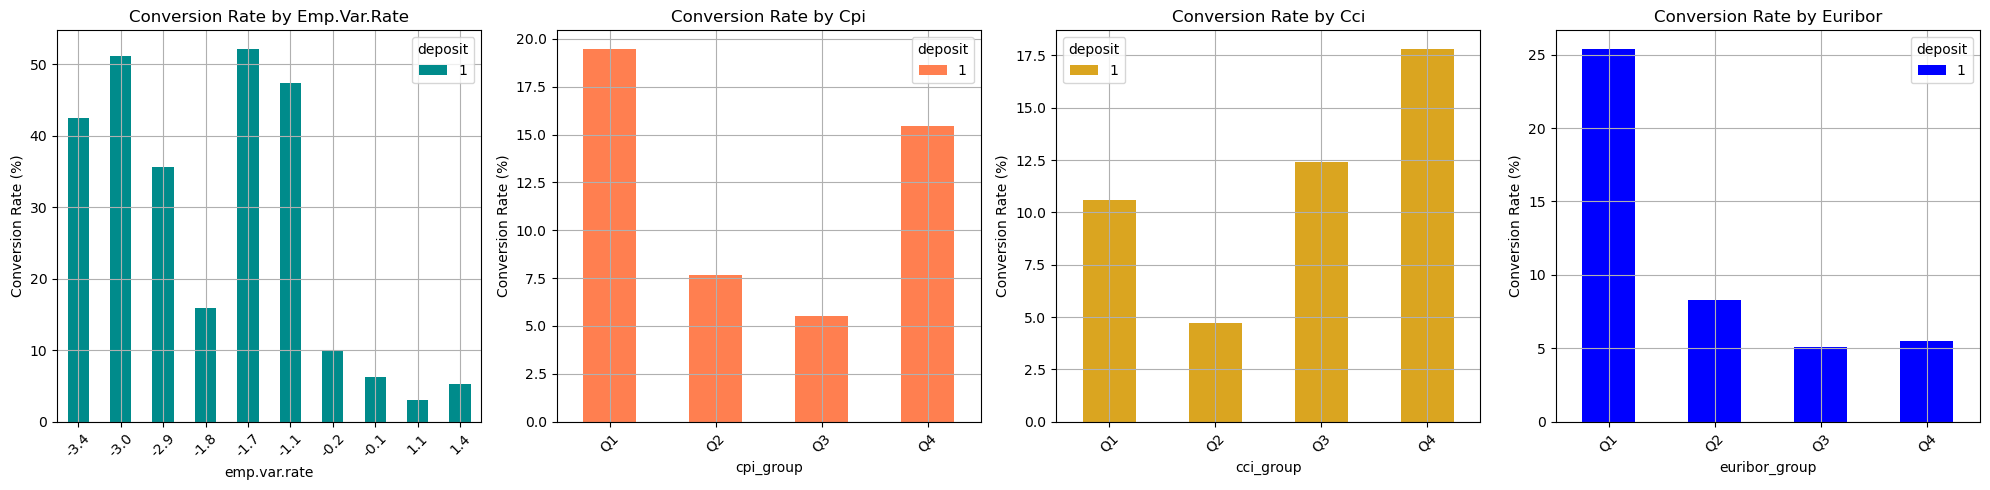

In [39]:
# df['cpi_group'] = pd.qcut(df['cons.price.idx'], q=4)
# df['cci_group'] = pd.qcut(df['cons.conf.idx'], q=4)
# df['euribor_group'] = pd.qcut(df['euribor3m'], q=4)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axs = axs.flatten()

soc_ec_index = ['emp.var.rate', 'cpi_group', 'cci_group', 'euribor_group']
color_bar = ['darkcyan', 'coral','goldenrod', 'blue']
for i, (col, colored) in enumerate(zip(soc_ec_index, color_bar)):
    met_conv = df.groupby(col)['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    met_conv[[1]].plot(kind='bar', ax=axs[i], color=colored)
    axs[i].set_ylabel('Conversion Rate (%)')
    axs[i].set_title(f'Conversion Rate by {col.replace("_group", "").replace("_", " ").title()}')
    axs[i].tick_params(axis='x', rotation=45, labelsize=10)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

The data indicates that customers are more likely to convert to term deposits during times of negative employment trends, weak consumer sentiment, and low Euribor rates. This suggests an opportunity to strategically target customers with fixed-term deposit offers during periods of economic uncertainty, when the appeal of secure investments is heightened

### 3. Bivariate Analysis

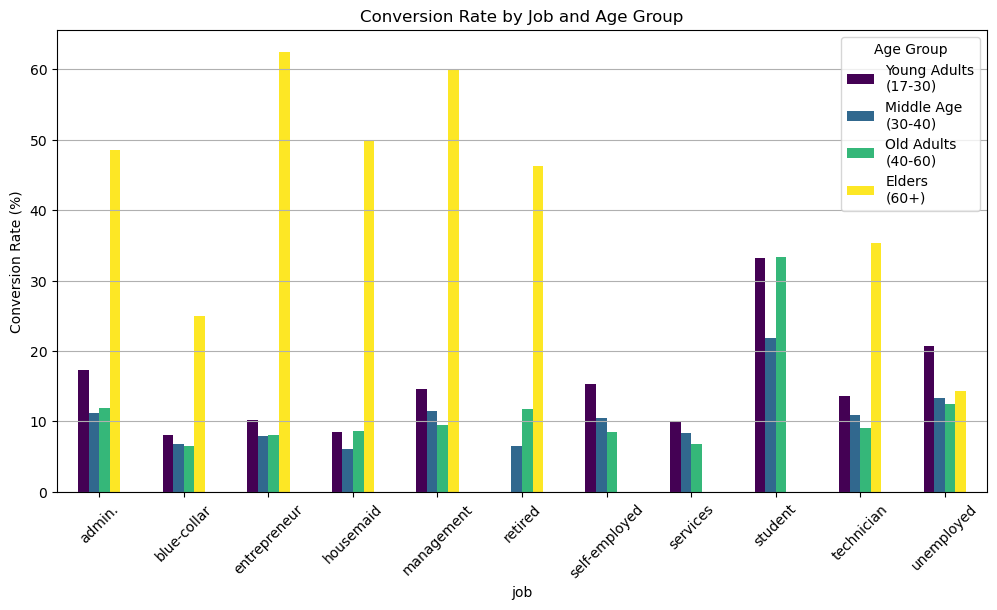

In [40]:
job_age_conv = df.pivot_table(index='job', columns='age_group', values='deposit', aggfunc=lambda x: (x==1).mean()*100)

job_age_conv.plot(kind='bar', figsize=(12, 6), cmap='viridis')
plt.title('Conversion Rate by Job and Age Group')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

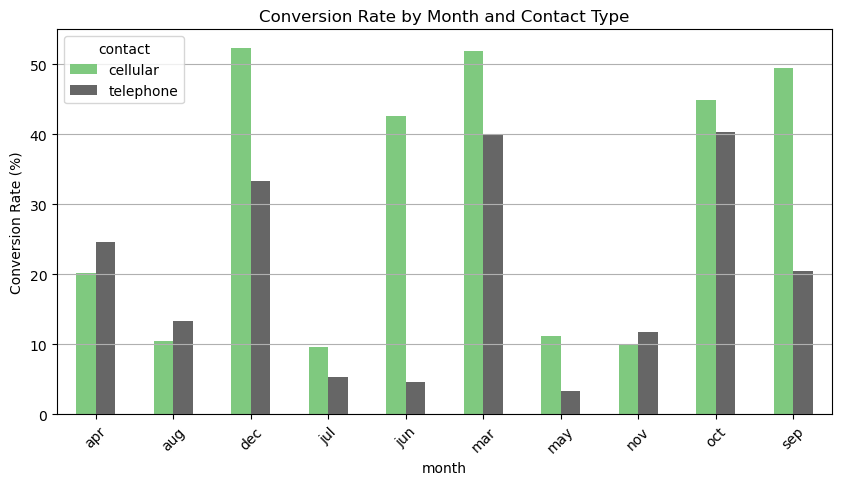

In [41]:
contact_month_conv = df.pivot_table(index='month', columns='contact', values='deposit', aggfunc=lambda x: (x==1).mean()*100)

contact_month_conv.plot(kind='bar', figsize=(10, 5), colormap='Accent')
plt.title('Conversion Rate by Month and Contact Type')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

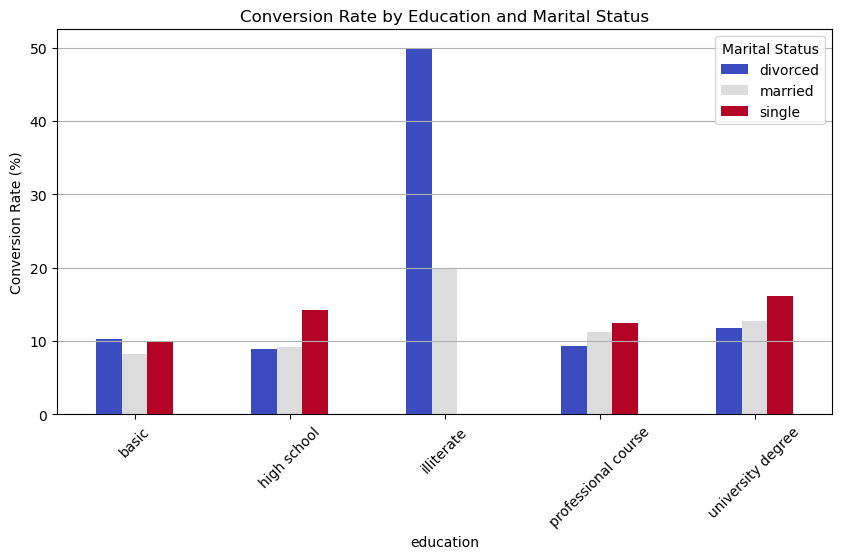

In [42]:
edu_marital_conv = df.pivot_table(index='education', columns='marital', values='deposit', aggfunc=lambda x: (x==1).mean()*100)

edu_marital_conv.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title('Conversion Rate by Education and Marital Status')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

### 4. Multivariate Analysis

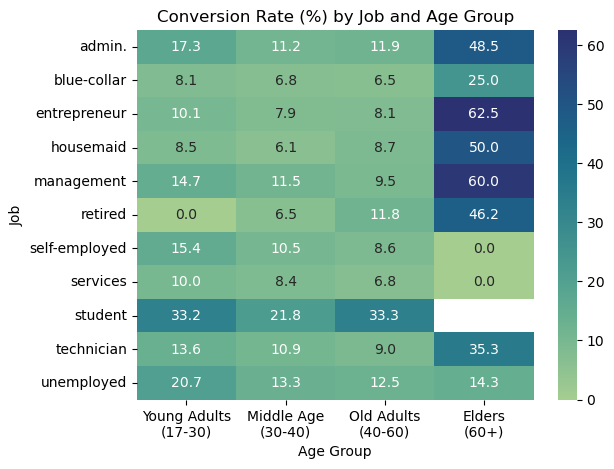

In [43]:
pivot = df.pivot_table(
    index='job',
    columns='age_group',
    values='deposit',
    aggfunc=lambda x: (x == 1).mean()
)

sns.heatmap(pivot * 100, annot=True, cmap='crest', fmt=".1f")
plt.title('Conversion Rate (%) by Job and Age Group')
plt.ylabel('Job')
plt.xlabel('Age Group')
plt.show()

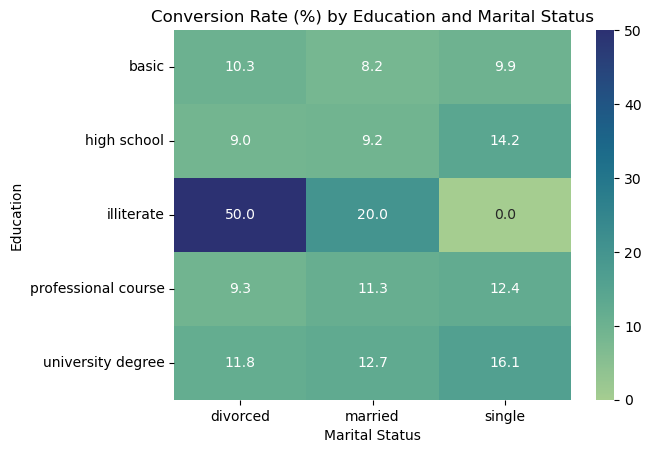

In [44]:
edu_marital = df.pivot_table(
    index='education',
    columns='marital',
    values='deposit',
    aggfunc=lambda x: (x == 1).mean()
)

sns.heatmap(edu_marital * 100, annot=True, cmap='crest', fmt=".1f")
plt.title('Conversion Rate (%) by Education and Marital Status')
plt.ylabel('Education')
plt.xlabel('Marital Status')
plt.show()

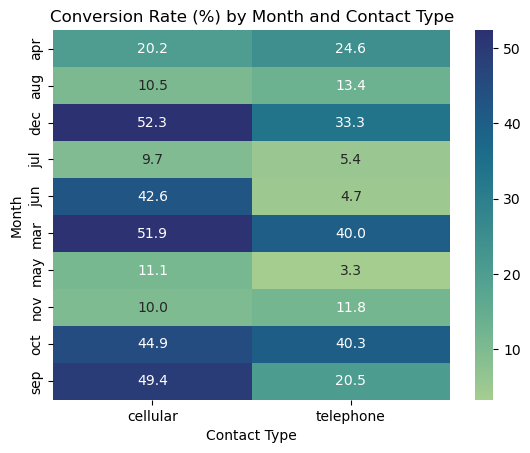

In [45]:
month_contact = df.pivot_table(
    index='month',
    columns='contact',
    values='deposit',
    aggfunc=lambda x: (x == 1).mean()
)

sns.heatmap(month_contact * 100, annot=True, cmap='crest', fmt=".1f")
plt.title('Conversion Rate (%) by Month and Contact Type')
plt.ylabel('Month')
plt.xlabel('Contact Type')
plt.show()

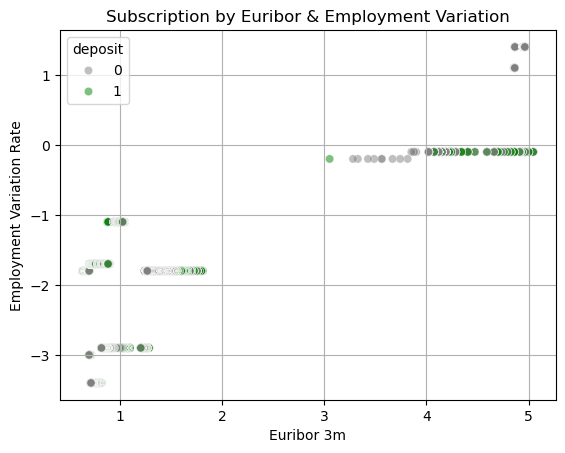

In [46]:
sns.scatterplot(
    x='euribor3m', y='emp.var.rate',
    hue='deposit', data=df,
    alpha=0.5, palette={1: 'green', 0: 'gray'}
)
plt.title('Subscription by Euribor & Employment Variation')
plt.xlabel('Euribor 3m')
plt.ylabel('Employment Variation Rate')
plt.grid(True)
plt.show()

## **D. Machine Learning**

With the dataset cleaned and explored, we now shift into the core of our project — building models that can make intelligent predictions. This phase focuses on extracting relevant features, preparing the data, training multiple classifiers, and evaluating their performance.

In [47]:
dfm = df.copy()

In [48]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41172 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 41172 non-null  int64   
 1   job                 41172 non-null  category
 2   marital             41172 non-null  category
 3   education           41172 non-null  category
 4   default             41172 non-null  category
 5   housing             41172 non-null  category
 6   loan                41172 non-null  category
 7   contact             41172 non-null  category
 8   month               41172 non-null  category
 9   day_of_week         41172 non-null  category
 10  duration            41172 non-null  int64   
 11  campaign            41172 non-null  int64   
 12  pdays               41172 non-null  int64   
 13  previous            41172 non-null  int64   
 14  poutcome            41172 non-null  category
 15  emp.var.rate        41172 non-null  float

### 1. Feature Engineering

To sharpen our model's performance, we need to refine the input features. Not all columns carry equal value, and some may introduce noise.

In [49]:
column_to_drop = ['duration', 'age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor_group', 'pdays', 'duration_group']
dfm.drop(column_to_drop, axis=1, inplace=True)

Dropping all the feature that already got binned, and the unneccessary ones

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
dfm['economic_index'] = pca.fit_transform(dfm[['euribor3m', 'emp.var.rate', 'nr.employed']])
dfm.drop(['euribor3m', 'emp.var.rate', 'nr.employed'], axis=1, inplace=True)

we use PCA to compress three economic indicators into a single component. This dimensionality reduction not only simplifies our model but captures the core economic trend affecting client decisions.

In [51]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41172 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job                 41172 non-null  category
 1   marital             41172 non-null  category
 2   education           41172 non-null  category
 3   default             41172 non-null  category
 4   housing             41172 non-null  category
 5   loan                41172 non-null  category
 6   contact             41172 non-null  category
 7   month               41172 non-null  category
 8   day_of_week         41172 non-null  category
 9   previous            41172 non-null  int64   
 10  poutcome            41172 non-null  category
 11  deposit             41172 non-null  int64   
 12  previous_contacted  41172 non-null  int64   
 13  age_group           41172 non-null  category
 14  campaign_group      41172 non-null  category
 15  cpi_group           41172 non-null  categ

### 2. Split Data

In [52]:
from sklearn.model_selection import train_test_split

X = dfm.drop(columns='deposit', axis=1)
y = dfm['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

The modeling dataset is split into X (features) and y (target: whether a client subscribed)

### 3. Preprocessing (Encoding and Pipelining)

In [53]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

In [54]:
one_hot_col = ['job', 'marital', 'default', 'contact', 'day_of_week', 'poutcome', "campaign_group", "cci_group", "cpi_group"]
one_hot_pipeline = Pipeline(
    steps=[('encode', OneHotEncoder(sparse_output=False))]
)

ordinal_col = ['education', 'month', 'age_group']
ordinal_pipeline = Pipeline(
    steps=[('encode', OrdinalEncoder())]
)

label_col = ['housing', 'loan']
label_pipeline = Pipeline(
    steps=[('encode', BinaryEncoder())]
)

In [55]:
transformer = ColumnTransformer([
    ('one_hot_preprocessing', one_hot_pipeline, one_hot_col),
    ('ordinal_preprocessing', ordinal_pipeline, ordinal_col),
    ('label_preprocessing', label_pipeline, label_col)
],remainder='passthrough')

### 4. Baseline Model

In [60]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline

We will test a lot of models to pick the top three with Cross validation. The model is:
1. Logistic Regression
2. Decision Tree
3. Random FOrest
4. Gradient Boosting
5. XG Boost

In [57]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

models = {
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='auc', random_state=42)
}

We will use SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set. This synthetic boost gives our model a fairer shot at learning both sides of the story

In [61]:
cv_results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_pipeline = Pipeline(steps=[
        ('preprocessor', transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    scores = cross_validate(cv_pipeline, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False)
    
    result = {
        'Model': name,
        'Accuracy': np.mean(scores['test_accuracy']),
        'Precision': np.mean(scores['test_precision']),
        'Recall': np.mean(scores['test_recall']),
        'F1 Score': np.mean(scores['test_f1']),
        'ROC AUC': np.mean(scores['test_roc_auc'])
    }
    cv_results.append(result)

results_df = pd.DataFrame(cv_results).sort_values(by='ROC AUC', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,Gradient Boosting,0.887270,0.499572,0.425494,0.459350,0.783546
4,XGBoost,0.896317,0.575630,0.302342,0.396146,0.782922
0,LogisticRegression,0.798737,0.310941,0.645920,0.419720,0.777523
2,Random Forest,0.885023,0.484674,0.326061,0.389755,0.762555
1,Decision Tree,0.843793,0.314876,0.328214,0.321326,0.623810


The top three based on the score overall measured by ROC AUC:
1. Gradient Boosing
2. XG Boost
3. Logistic Regression

In [63]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [64]:
from sklearn.metrics import classification_report

top_two_models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

for name, clf in top_two_models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocess', transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', clf)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    print(f"\n🔹 Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


🔹 Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7307
           1       0.50      0.45      0.47       928

    accuracy                           0.89      8235
   macro avg       0.72      0.70      0.71      8235
weighted avg       0.88      0.89      0.88      8235

ROC AUC: 0.7944

🔹 Model: XGBoost
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7307
           1       0.59      0.31      0.41       928

    accuracy                           0.90      8235
   macro avg       0.75      0.64      0.68      8235
weighted avg       0.88      0.90      0.88      8235

ROC AUC: 0.7972


Gradient Boosting: Balanced model with best F1 score and decent recall. This is your most reliable model overall.

XGBoost: Slightly higher accuracy and precision than Gradient Boosting, but recall is worse (i.e., it misses more true positives).

### 5. Model Tuning

#### - Models with SMOTE

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer, classification_report, roc_auc_score, average_precision_score
from imblearn.pipeline import Pipeline as ImbPipeline

params = {
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        "n_estimators": [100, 200],
        "max_depth": [3, 5],
        "learning_rate": [0.05, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}

from collections import Counter

counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
print(f"Scale pos weight: {scale_pos_weight:.2f}")

top_models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='auc')
}

scorer = make_scorer(f1_score, pos_label=1)

Scale pos weight: 7.88


In [70]:
import os
import warnings
import sys

os.environ['PYTHONWARNINGS'] = 'ignore' 

if not sys.warnoptions:
    warnings.simplefilter("ignore", category=FutureWarning)
    warnings.simplefilter("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
best_params = {}

for name, model in top_models.items():
    print(f"\nTraining {name}...")

    pipe = ImbPipeline([
        ('preprocessing', transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    param_grid = {f'classifier__{key}': val for key, val in params[name].items()}

    grid = RandomizedSearchCV(
        pipe,
        param_distributions=param_grid,
        n_iter=30,
        scoring=scorer,
        cv=5,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    grid.fit(X_train, y_train)
    best_params[name] = grid

    print(f"Best parameters for {name}:")
    print(grid.best_params_)


Training Gradient Boosting...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=  24.8s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=  25.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=  25.2s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=  25.1s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_sa

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve
import numpy as np

gb_model = best_params["Gradient Boosting"].best_estimator_

y_proba = gb_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

y_pred_best = (y_proba >= best_thresh).astype(int)

print(f"✅ Best Threshold for Gradient Boosting: {best_thresh:.2f} (F1: {best_f1:.4f})")
print(classification_report(y_test, y_pred_best))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")

✅ Best Threshold for Gradient Boosting: 0.54 (F1: 0.5195)
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7307
           1       0.50      0.55      0.52       928

    accuracy                           0.89      8235
   macro avg       0.72      0.74      0.73      8235
weighted avg       0.89      0.89      0.89      8235

ROC AUC Score: 0.7971
AUC PR Score: 0.4591


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve
import numpy as np

xg_model = best_params["XGBoost"].best_estimator_

y_proba = xg_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

y_pred_best = (y_proba >= best_thresh).astype(int)

print(f"✅ Best Threshold for XGBoost: {best_thresh:.2f} (F1: {best_f1:.4f})")
print(classification_report(y_test, y_pred_best))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")


✅ Best Threshold for XGBoost: 0.74 (F1: 0.5213)
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7307
           1       0.50      0.55      0.52       928

    accuracy                           0.89      8235
   macro avg       0.72      0.74      0.73      8235
weighted avg       0.89      0.89      0.89      8235

ROC AUC Score: 0.7992
AUC PR Score: 0.4658



🔍 Threshold-Optimized Evaluation for Gradient Boosting


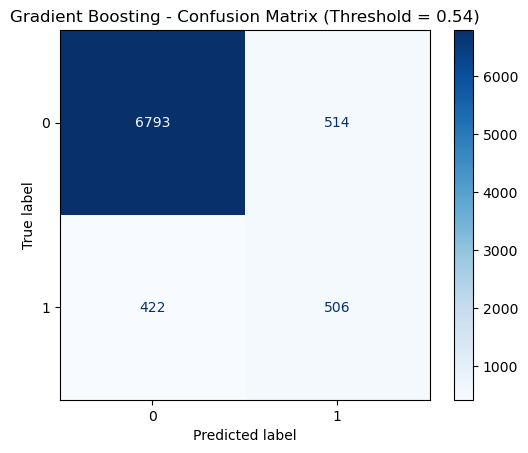


🔍 Threshold-Optimized Evaluation for XGBoost


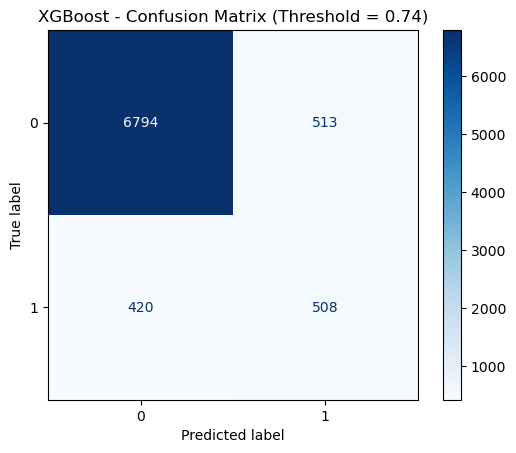

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, best_model in best_params.items():
    print(f"\n🔍 Threshold-Optimized Evaluation for {name}")

    y_proba = best_model.predict_proba(X_test)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    y_pred_best = (y_proba >= best_thresh).astype(int)

    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} - Confusion Matrix (Threshold = {best_thresh:.2f})')
    plt.show()

Best Gradient Boosting: Gradient Boosting with F1 = 0.5195
Best XGBoost: XGBoost with F1 = 0.5213


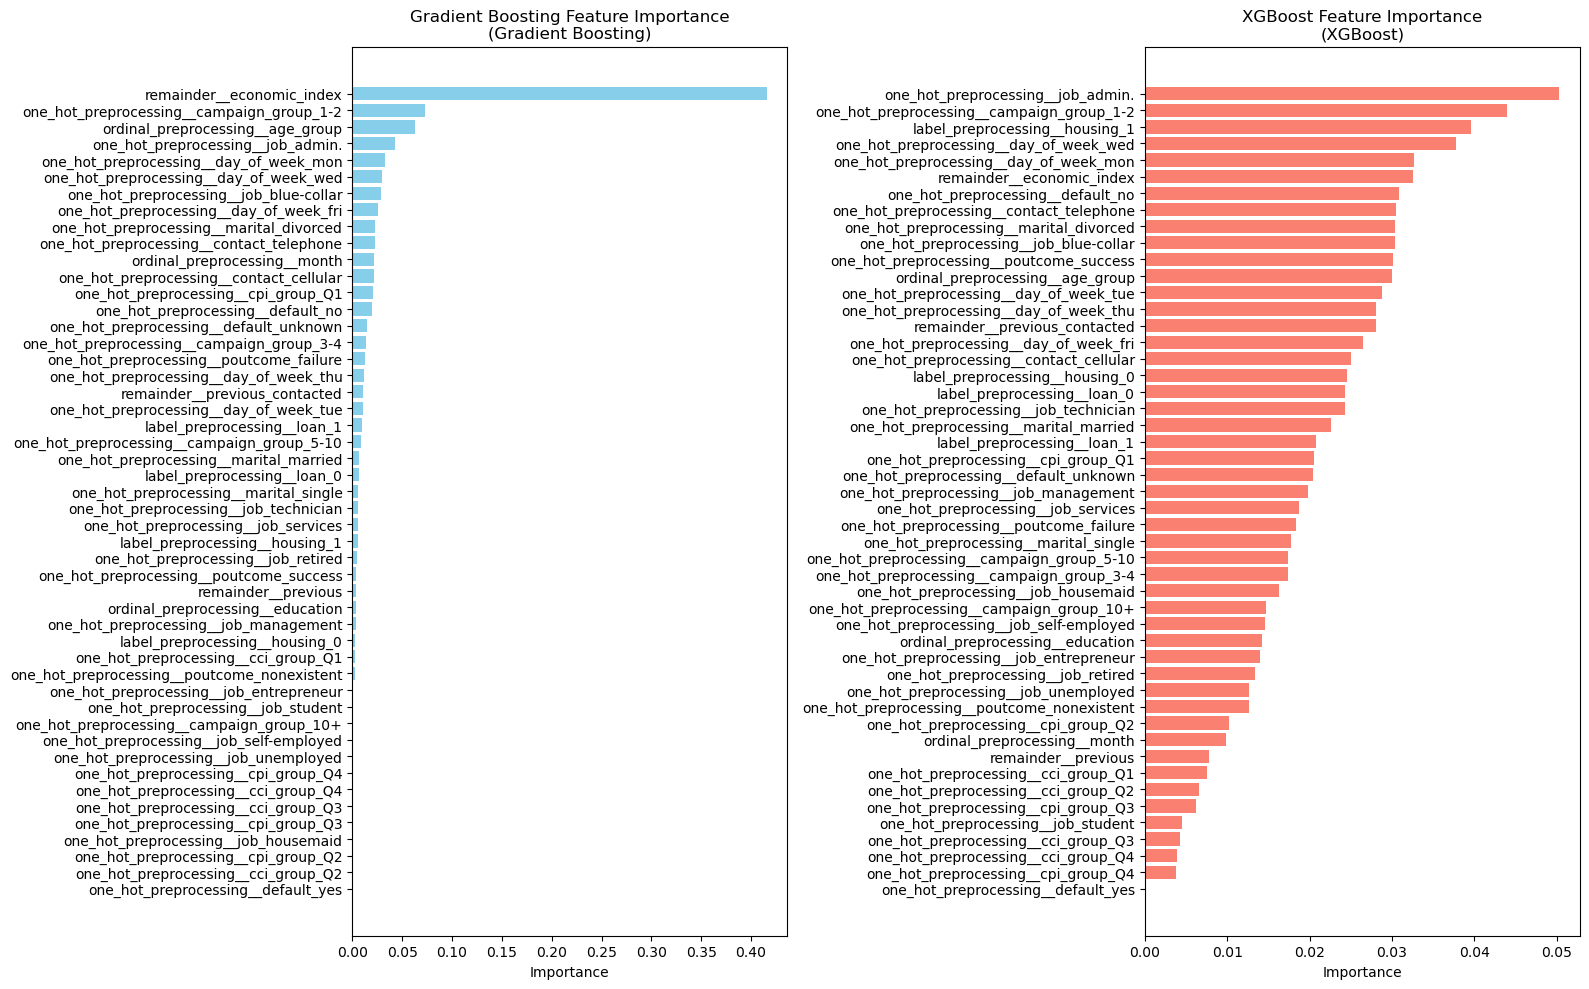

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def get_feature_names_from_transformer(search_cv):
    pipe = search_cv.best_estimator_
    preprocessor = pipe.named_steps['preprocessing']
    try:
        return preprocessor.get_feature_names_out()
    except AttributeError:
        if hasattr(X_train, 'columns'):
            return X_train.columns
        else:
            clf = pipe.named_steps['classifier']
            return [f"feature_{i}" for i in range(clf.n_features_in_)]

def best_model_for(model_name):
    model_cv = best_params[model_name]
    y_proba = model_cv.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_f1 = f1_scores[best_idx]
    return model_name, {'pipeline': model_cv.best_estimator_, 'f1_at_best_thresh': best_f1}

best_gb_key, best_gb_result = best_model_for('Gradient Boosting')
best_xgb_key, best_xgb_result = best_model_for('XGBoost')

print(f"Best Gradient Boosting: {best_gb_key} with F1 = {best_gb_result['f1_at_best_thresh']:.4f}")
print(f"Best XGBoost: {best_xgb_key} with F1 = {best_xgb_result['f1_at_best_thresh']:.4f}")

def extract_trained_model(pipeline):
    clf = pipeline.named_steps['classifier']
    return clf.best_estimator_ if hasattr(clf, 'best_estimator_') else clf

gb_model = extract_trained_model(best_gb_result['pipeline'])
xgb_model = extract_trained_model(best_xgb_result['pipeline'])

gb_feat_imp = gb_model.feature_importances_
xgb_feat_imp = xgb_model.feature_importances_

gb_features = get_feature_names_from_transformer(best_params['Gradient Boosting'])
xgb_features = get_feature_names_from_transformer(best_params['XGBoost'])

gb_df = pd.DataFrame({'Feature': gb_features, 'Importance': gb_feat_imp}).sort_values(by='Importance', ascending=True)
xgb_df = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_feat_imp}).sort_values(by='Importance', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

axes[0].barh(gb_df['Feature'], gb_df['Importance'], color='skyblue')
axes[0].set_title(f'Gradient Boosting Feature Importance\n({best_gb_key})')
axes[0].set_xlabel('Importance')

axes[1].barh(xgb_df['Feature'], xgb_df['Importance'], color='salmon')
axes[1].set_title(f'XGBoost Feature Importance\n({best_xgb_key})')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate with only top 10 Features

def get_feature_names_from_transformer(search_cv):
    pipe = search_cv.best_estimator_
    preprocessor = pipe.named_steps['preprocessing']
    try:
        return preprocessor.get_feature_names_out()
    except AttributeError:
        if hasattr(X_train, 'columns'):
            return X_train.columns
        else:
            clf = pipe.named_steps['classifier']
            return [f"feature_{i}" for i in range(clf.n_features_in_)]

def extract_trained_model(pipeline):
    clf = pipeline.named_steps['classifier']
    return clf.best_estimator_ if hasattr(clf, 'best_estimator_') else clf

best_gb = best_params['Gradient Boosting']
best_xgb = best_params['XGBoost']

gb_pipe = best_gb.best_estimator_
xgb_pipe = best_xgb.best_estimator_

gb_model = extract_trained_model(gb_pipe)
xgb_model = extract_trained_model(xgb_pipe)

gb_features = get_feature_names_from_transformer(best_gb)
xgb_features = get_feature_names_from_transformer(best_xgb)

gb_importance_df = pd.DataFrame({'Feature': gb_features, 'Importance': gb_model.feature_importances_})
xgb_importance_df = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_model.feature_importances_})

top10_gb_features = gb_importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()
top10_xgb_features = xgb_importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()

X_train_gb_top10 = pd.DataFrame(gb_pipe.named_steps['preprocessing'].transform(X_train), columns=gb_features)[top10_gb_features]
X_test_gb_top10 = pd.DataFrame(gb_pipe.named_steps['preprocessing'].transform(X_test), columns=gb_features)[top10_gb_features]

X_train_xgb_top10 = pd.DataFrame(xgb_pipe.named_steps['preprocessing'].transform(X_train), columns=xgb_features)[top10_xgb_features]
X_test_xgb_top10 = pd.DataFrame(xgb_pipe.named_steps['preprocessing'].transform(X_test), columns=xgb_features)[top10_xgb_features]

gb_top10_params = {k.replace('classifier__', ''): v for k, v in best_gb.best_params_.items()}
gb_top10_model = GradientBoostingClassifier(**gb_top10_params, random_state=42)

xgb_top10_params = {k.replace('classifier__', ''): v for k, v in best_xgb.best_params_.items()}
xgb_top10_model = XGBClassifier(**xgb_top10_params, random_state=42, use_label_encoder=False, eval_metric='auc')

gb_top10_model.fit(X_train_gb_top10, y_train)
xgb_top10_model.fit(X_train_xgb_top10, y_train)

for model_name, model, X_test_top10 in [
    ('Gradient Boosting (Top 10)', gb_top10_model, X_test_gb_top10),
    ('XGBoost (Top 10)', xgb_top10_model, X_test_xgb_top10)
]:
    y_pred = model.predict(X_test_top10)
    y_proba = model.predict_proba(X_test_top10)[:, 1]
    print(f"\n📊 {model_name} Evaluation")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")



📊 Gradient Boosting (Top 10) Evaluation
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7307
           1       0.61      0.22      0.33       928

    accuracy                           0.90      8235
   macro avg       0.76      0.60      0.63      8235
weighted avg       0.88      0.90      0.87      8235

ROC AUC Score: 0.8059
AUC PR Score: 0.4220

📊 XGBoost (Top 10) Evaluation
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7307
           1       0.58      0.21      0.31       928

    accuracy                           0.89      8235
   macro avg       0.74      0.60      0.63      8235
weighted avg       0.87      0.89      0.87      8235

ROC AUC Score: 0.8009
AUC PR Score: 0.4265


#### - Models with Undersampling Methods

Having previously experimented with **SMOTE (Synthetic Minority Over-sampling Technique)** to address the class imbalance, we will now explore **undersampling** as an alternative strategy. While SMOTE generates synthetic samples for the minority class, undersampling focuses on reducing the number of samples in the majority class to balance the dataset.

In [ ]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks

undersamplers = {
    "NearMiss_v3": NearMiss(version=3, n_neighbors_ver3=3),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "TomekLinks": TomekLinks()
}

params = {
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        "n_estimators": [100, 200],
        "max_depth": [3, 5],
        "learning_rate": [0.05, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}

top_models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

scorer = make_scorer(f1_score, pos_label=1)

In [ ]:
all_results = {}

for undersample_name, undersampler in undersamplers.items():
    print(f"\n=== Undersampling: {undersample_name} ===")
    best_pipelines = {}

    for name, model in top_models.items():
        print(f"\nTraining {name}...")

        pipe = ImbPipeline([
            ('preprocessing', transformer),
            ('undersample', undersampler),
            ('classifier', model)
        ])

        if name in params:

            param_grid = {f'classifier__{key}': val for key, val in params[name].items()}

            grid = RandomizedSearchCV(
                pipe,
                param_distributions=param_grid,
                n_iter=30,
                scoring=scorer,
                cv=5,
                n_jobs=-1,
                verbose=2,
                random_state=42
            )

            grid.fit(X_train, y_train)
            best_pipelines[name] = grid

            print(f"Best parameters for {name} ({undersample_name}):")
            print(grid.best_params_)

        else:
    
            pipe.fit(X_train, y_train)
            best_pipelines[name] = pipe

    all_results[undersample_name] = best_pipelines



=== Undersampling: NearMiss_v3 ===

Training Gradient Boosting...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.9s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.9s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.9s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.9s
[CV] END classifier__learning_rate=0.1, classif

In [87]:
from sklearn.metrics import average_precision_score

for name, pipe in best_pipelines.items():
        print(f"\nEvaluating {name} with {undersample_name}...")
        y_pred = pipe.predict(X_test)
        y_proba = pipe.predict_proba(X_test)[:, 1]

        print(classification_report(y_test, y_pred))
        print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
        print("AUC PR:", average_precision_score(y_test, y_proba))

        all_results[(undersample_name, name)] = {
            "pipeline": pipe,
            "roc_auc": roc_auc_score(y_test, y_proba),
            "auc_pr": average_precision_score(y_test, y_proba),
            "report": classification_report(y_test, y_pred, output_dict=True)
        }


Evaluating Gradient Boosting with TomekLinks...
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7307
           1       0.59      0.30      0.40       928

    accuracy                           0.90      8235
   macro avg       0.76      0.64      0.67      8235
weighted avg       0.88      0.90      0.88      8235

ROC AUC Score: 0.8075544146378295
AUC PR: 0.46638549297393317

Evaluating XGBoost with TomekLinks...
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7307
           1       0.59      0.30      0.40       928

    accuracy                           0.90      8235
   macro avg       0.75      0.64      0.67      8235
weighted avg       0.88      0.90      0.88      8235

ROC AUC Score: 0.8078952250558038
AUC PR: 0.47335926771663556


In [90]:
for name, pipe in best_pipelines.items():
    print(f"\n📊 Evaluating {name} with {undersample_name}...")

    y_proba = pipe.predict_proba(X_test)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    y_pred_best = (y_proba >= best_thresh).astype(int)

    print(f"✅ Best Threshold: {best_thresh:.2f} (F1: {best_f1:.4f})")
    print(classification_report(y_test, y_pred_best))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")

    all_results[(undersample_name, name)] = {
        "pipeline": pipe,
        "roc_auc": roc_auc_score(y_test, y_proba),
        "auc_pr": average_precision_score(y_test, y_proba),
        "best_threshold": best_thresh,
        "f1_at_best_thresh": best_f1,
        "report": classification_report(y_test, y_pred_best, output_dict=True)
    }


📊 Evaluating Gradient Boosting with TomekLinks...
✅ Best Threshold: 0.21 (F1: 0.5216)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7307
           1       0.47      0.59      0.52       928

    accuracy                           0.88      8235
   macro avg       0.71      0.75      0.73      8235
weighted avg       0.89      0.88      0.88      8235

ROC AUC Score: 0.8076
AUC PR Score: 0.4664

📊 Evaluating XGBoost with TomekLinks...
✅ Best Threshold: 0.22 (F1: 0.5293)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7307
           1       0.48      0.59      0.53       928

    accuracy                           0.88      8235
   macro avg       0.71      0.76      0.73      8235
weighted avg       0.89      0.88      0.89      8235

ROC AUC Score: 0.8079
AUC PR Score: 0.4734



🔍 Confusion Matrix for Gradient Boosting with TomekLinks


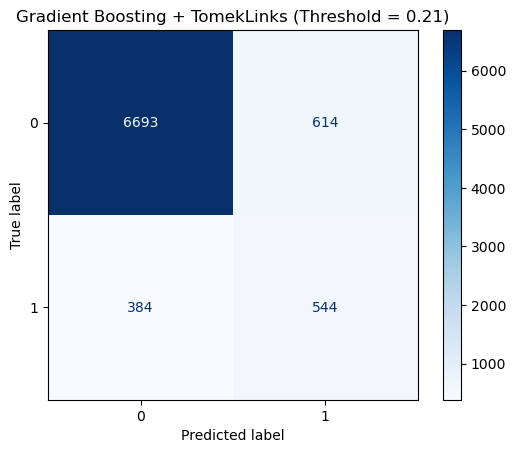


🔍 Confusion Matrix for XGBoost with TomekLinks


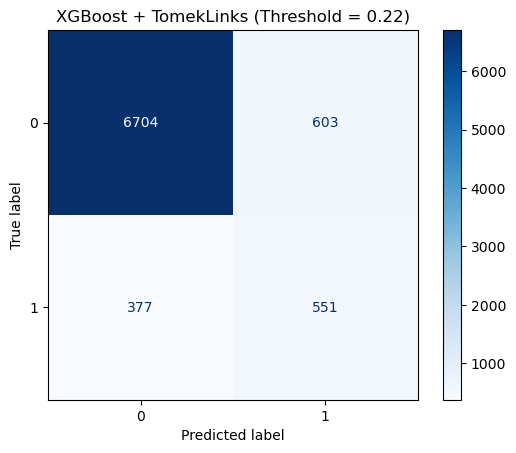

In [ ]:
for key, result in all_results.items():
    if not isinstance(key, tuple) or "best_threshold" not in result:
        continue  

    undersample_name, model_name = key
    print(f"\n🔍 Confusion Matrix for {model_name} with {undersample_name}")

    pipe = result["pipeline"]
    threshold = result["best_threshold"]

    y_proba = pipe.predict_proba(X_test)[:, 1]
    y_pred_thresh = (y_proba >= threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} + {undersample_name} (Threshold = {threshold:.2f})")
    plt.show()

In [ ]:
# Get Feature Importances

def get_feature_names_from_transformer(pipe):
    try:
        return pipe.named_steps['preprocessing'].get_feature_names_out()
    except:
        if hasattr(X_train, 'columns'):
            return X_train.columns
        else:
            clf = pipe.named_steps['classifier']
            n_features = clf.n_features_in_ if hasattr(clf, 'n_features_in_') else 0
            return [f"feature_{i}" for i in range(n_features)]

def extract_trained_model(pipe_or_searchcv):
    if hasattr(pipe_or_searchcv, 'best_estimator_'):
        final_pipe = pipe_or_searchcv.best_estimator_
    else:
        final_pipe = pipe_or_searchcv

    clf = final_pipe.named_steps['classifier']
    return clf, final_pipe

def best_model_for(model_name):
    filtered_keys = [k for k in all_results.keys() if k[1] == model_name]
    best_key = max(filtered_keys, key=lambda k: all_results[k]['f1_at_best_thresh'])
    return best_key, all_results[best_key]

Best Gradient Boosting: ('TomekLinks', 'Gradient Boosting') with F1 = 0.5216
Best XGBoost: ('TomekLinks', 'XGBoost') with F1 = 0.5293


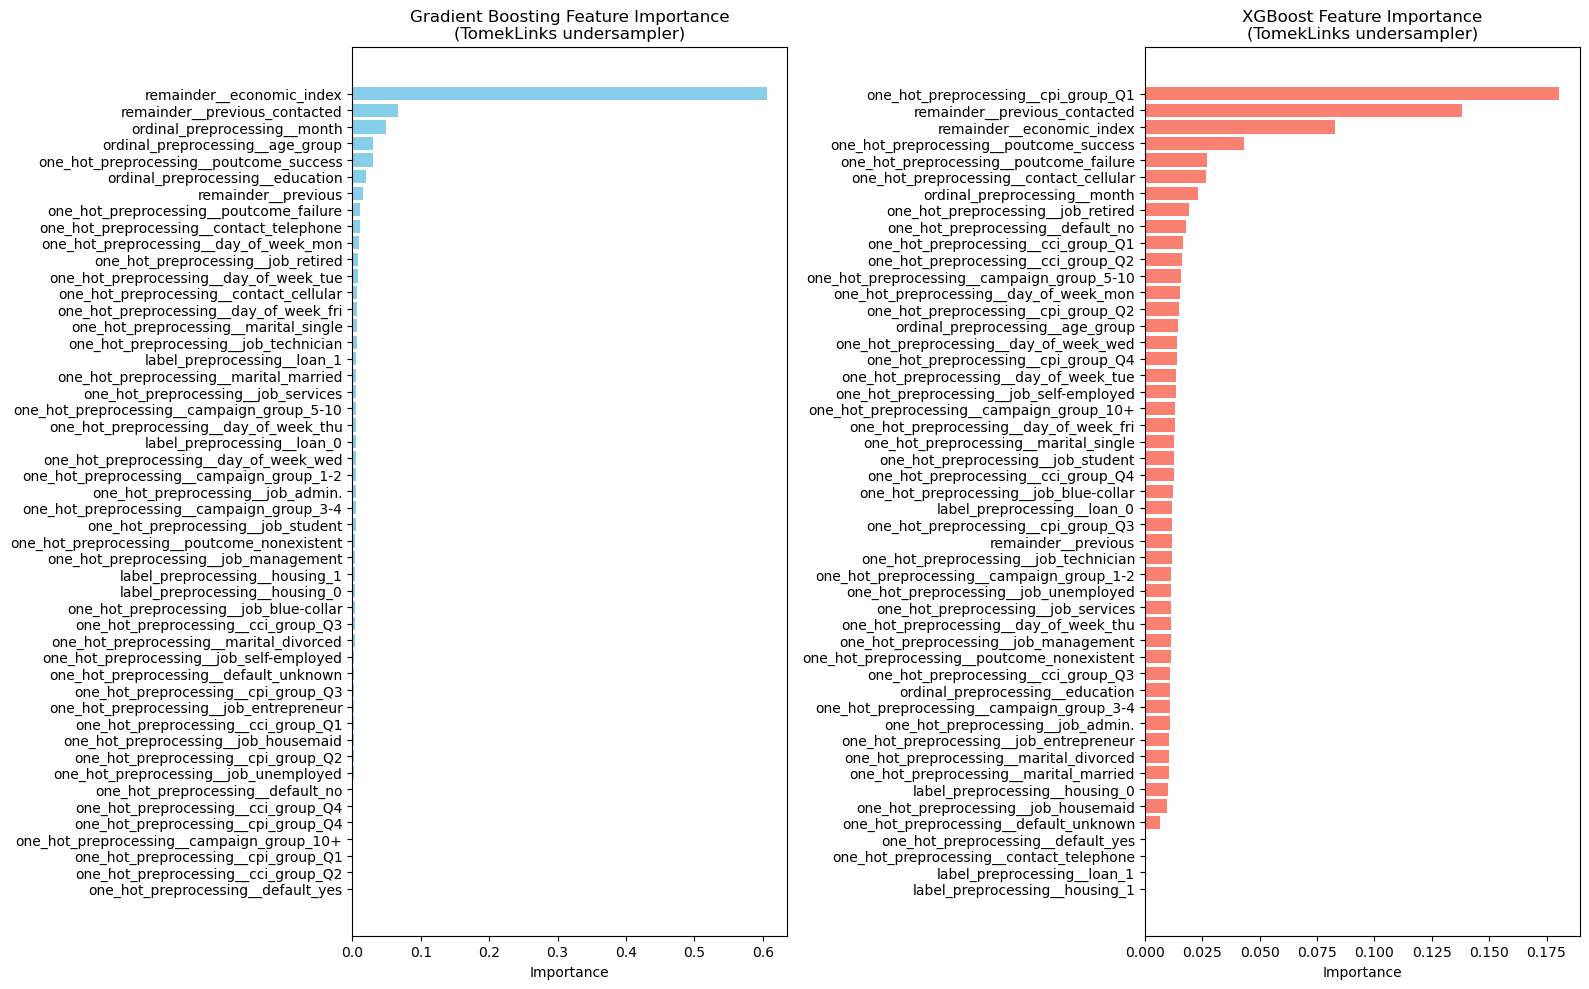

In [ ]:
best_gb_key, best_gb_result = best_model_for('Gradient Boosting')
best_xgb_key, best_xgb_result = best_model_for('XGBoost')

print(f"Best Gradient Boosting: {best_gb_key} with F1 = {best_gb_result['f1_at_best_thresh']:.4f}")
print(f"Best XGBoost: {best_xgb_key} with F1 = {best_xgb_result['f1_at_best_thresh']:.4f}")

gb_model, gb_pipeline = extract_trained_model(best_gb_result['pipeline'])
xgb_model, xgb_pipeline = extract_trained_model(best_xgb_result['pipeline'])

gb_feat_imp = gb_model.feature_importances_
xgb_feat_imp = xgb_model.feature_importances_

gb_features = get_feature_names_from_transformer(gb_pipeline)
xgb_features = get_feature_names_from_transformer(xgb_pipeline)

gb_df = pd.DataFrame({'Feature': gb_features, 'Importance': gb_feat_imp}).sort_values(by='Importance', ascending=True)
xgb_df = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_feat_imp}).sort_values(by='Importance', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

axes[0].barh(gb_df['Feature'], gb_df['Importance'], color='skyblue')
axes[0].set_title(f'Gradient Boosting Feature Importance\n({best_gb_key[0]} undersampler)')
axes[0].set_xlabel('Importance')

axes[1].barh(xgb_df['Feature'], xgb_df['Importance'], color='salmon')
axes[1].set_title(f'XGBoost Feature Importance\n({best_xgb_key[0]} undersampler)')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate with only top 10 features

def get_best_params(searchcv_or_pipeline):
    if hasattr(searchcv_or_pipeline, 'best_params_'):
        return searchcv_or_pipeline.best_params_
    elif hasattr(searchcv_or_pipeline, 'named_steps') and hasattr(searchcv_or_pipeline.named_steps['classifier'], 'get_params'):
        return searchcv_or_pipeline.named_steps['classifier'].get_params()
    else:
        return {}

def extract_trained_model(searchcv_or_pipeline):
    if hasattr(searchcv_or_pipeline, 'best_estimator_'):
        pipeline = searchcv_or_pipeline.best_estimator_
    else:
        pipeline = searchcv_or_pipeline
    return pipeline.named_steps['classifier']

def get_top_features(model, features, top_n=10):
    importances = model.feature_importances_
    feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    top_features = feat_imp_df.sort_values('Importance', ascending=False).head(top_n)['Feature'].tolist()
    return top_features

def evaluate_model(pipe, X_test, y_test, model_name):
    print(f"\nEvaluating {model_name} on top 10 features...")

    y_proba = pipe.predict_proba(X_test)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    y_pred_best = (y_proba >= best_thresh).astype(int)

    print(f"Best Threshold: {best_thresh:.2f} (F1: {best_f1:.4f})")
    print(classification_report(y_test, y_pred_best))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")

In [ ]:
best_gb_result = all_results[best_gb_key]
best_xgb_result = all_results[best_xgb_key]

gb_model = extract_trained_model(best_gb_result['pipeline'])
xgb_model = extract_trained_model(best_xgb_result['pipeline'])

best_params_gb = get_best_params(best_gb_result['pipeline'])
best_params_xgb = get_best_params(best_xgb_result['pipeline'])

X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)

feature_names = transformer.get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

top10_gb_features = get_top_features(gb_model, feature_names, top_n=10)
top10_xgb_features = get_top_features(xgb_model, feature_names, top_n=10)

print("Top 10 Gradient Boosting features:", top10_gb_features)
print("Top 10 XGBoost features:", top10_xgb_features)

X_train_top_gb = X_train_transformed_df[top10_gb_features]
X_test_top_gb = X_test_transformed_df[top10_gb_features]

X_train_top_xgb = X_train_transformed_df[top10_xgb_features]
X_test_top_xgb = X_test_transformed_df[top10_xgb_features]

best_undersampler_gb = undersamplers[best_gb_key[0]]
best_undersampler_xgb = undersamplers[best_xgb_key[0]]

gb_valid_params = {k: best_params_gb[k] for k in best_params_gb if k in GradientBoostingClassifier().get_params()}
xgb_valid_params = {k: best_params_xgb[k] for k in best_params_xgb if k in XGBClassifier().get_params()}

gb_final_model = GradientBoostingClassifier(random_state=42, **gb_valid_params)
xgb_final_model = XGBClassifier(random_state=42, eval_metric='logloss', **xgb_valid_params)

gb_pipe_top = ImbPipeline([
    ('undersample', best_undersampler_gb),
    ('classifier', gb_final_model)
])

xgb_pipe_top = ImbPipeline([
    ('undersample', best_undersampler_xgb),
    ('classifier', xgb_final_model)
])

gb_pipe_top.fit(X_train_top_gb, y_train)
xgb_pipe_top.fit(X_train_top_xgb, y_train)

evaluate_model(gb_pipe_top, X_test_top_gb, y_test, "Gradient Boosting (top 10 features)")
evaluate_model(xgb_pipe_top, X_test_top_xgb, y_test, "XGBoost (top 10 features)")

Top 10 Gradient Boosting features: ['remainder__economic_index', 'remainder__previous_contacted', 'ordinal_preprocessing__month', 'ordinal_preprocessing__age_group', 'one_hot_preprocessing__poutcome_success', 'ordinal_preprocessing__education', 'remainder__previous', 'one_hot_preprocessing__poutcome_failure', 'one_hot_preprocessing__contact_telephone', 'one_hot_preprocessing__day_of_week_mon']
Top 10 XGBoost features: ['one_hot_preprocessing__cpi_group_Q1', 'remainder__previous_contacted', 'remainder__economic_index', 'one_hot_preprocessing__poutcome_success', 'one_hot_preprocessing__poutcome_failure', 'one_hot_preprocessing__contact_cellular', 'ordinal_preprocessing__month', 'one_hot_preprocessing__job_retired', 'one_hot_preprocessing__default_no', 'one_hot_preprocessing__cci_group_Q1']

Evaluating Gradient Boosting (top 10 features) on top 10 features...
Best Threshold: 0.20 (F1: 0.5274)
              precision    recall  f1-score   support

           0       0.95      0.91      0.9

#### - Voting Classifier

a. Oversampling Method

✅ Voting Classifier Best Threshold: 0.25 (F1: 0.5248)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7307
           1       0.48      0.58      0.52       928

    accuracy                           0.88      8235
   macro avg       0.71      0.75      0.73      8235
weighted avg       0.89      0.88      0.89      8235

ROC AUC Score: 0.8051403531332733
AUC PR Score: 0.4749609361691024


<Figure size 600x500 with 0 Axes>

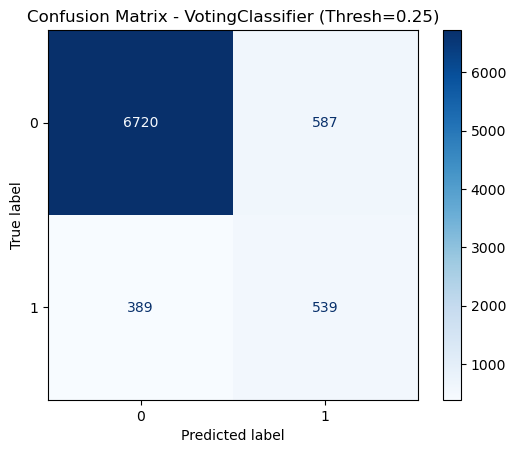

In [ ]:
from sklearn.ensemble import VotingClassifier

def get_valid_params(best_result, model_cls):
    grid = best_result["pipeline"]
    if hasattr(grid, "best_params_"):
        raw_params = grid.best_params_
        return {k.replace("classifier__", ""): v for k, v in raw_params.items() if k.startswith("classifier__")}
    return {}

gb_params = get_valid_params(best_gb_result, GradientBoostingClassifier)
xgb_params = get_valid_params(best_xgb_result, XGBClassifier)

gb_model = GradientBoostingClassifier(random_state=42, **gb_params)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', **xgb_params)

voting_clf = VotingClassifier(estimators=[
    ('gb', gb_model),
    ('xgb', xgb_model)
], voting='soft', n_jobs=-1)

voting_pipeline = ImbPipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE(random_state=42)),
    ('voting', voting_clf)
])

voting_pipeline.fit(X_train, y_train)

y_proba = voting_pipeline.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

y_pred_best = (y_proba >= best_thresh).astype(int)

print(f"✅ Voting Classifier Best Threshold: {best_thresh:.2f} (F1: {best_f1:.4f})")
print(classification_report(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("AUC PR Score:", average_precision_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - VotingClassifier (Thresh={best_thresh:.2f})')
plt.grid(False)
plt.show()

b. Undersampler Methods


✅ VotingClassifier with Undersampling (TomekLinks)
Best Threshold: 0.22 (F1 = 0.5270)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7307
           1       0.48      0.59      0.53       928

    accuracy                           0.88      8235
   macro avg       0.71      0.75      0.73      8235
weighted avg       0.89      0.88      0.89      8235

ROC AUC Score: 0.8091
AUC PR Score: 0.4740


<Figure size 600x500 with 0 Axes>

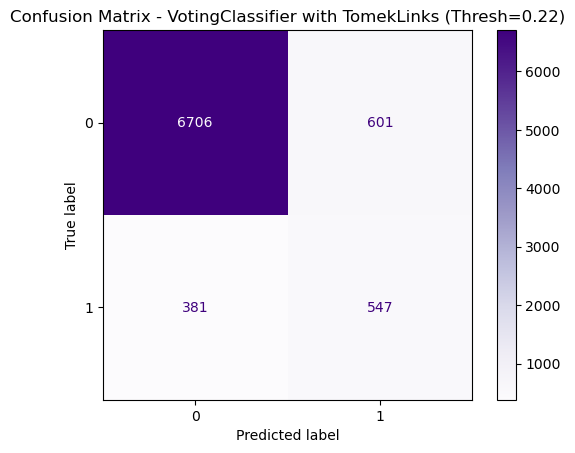

In [ ]:
best_gb_key, best_gb_result = best_model_for('Gradient Boosting')
best_xgb_key, best_xgb_result = best_model_for('XGBoost')

gb_model = extract_trained_model(best_gb_result['pipeline'])
xgb_model = extract_trained_model(best_xgb_result['pipeline'])

best_undersampler_name = best_gb_key[0]  
best_undersampler = undersamplers[best_undersampler_name]

voting_clf_under = VotingClassifier(
    estimators=[('gb', gb_model), ('xgb', xgb_model)],
    voting='soft'
)

voting_pipe_under = ImbPipeline([
    ('preprocessing', transformer),
    ('undersample', best_undersampler),
    ('classifier', voting_clf_under)
])

voting_pipe_under.fit(X_train, y_train)

y_proba = voting_pipe_under.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

y_pred_best = (y_proba >= best_thresh).astype(int)

print(f"\n✅ VotingClassifier with Undersampling ({best_undersampler_name})")
print(f"Best Threshold: {best_thresh:.2f} (F1 = {best_f1:.4f})")
print(classification_report(y_test, y_pred_best))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Purples', values_format='d')
plt.title(f'Confusion Matrix - VotingClassifier with {best_undersampler_name} (Thresh={best_thresh:.2f})')
plt.grid(False)
plt.show()


#### - Stacking Classifier

a. Oversampling Methods


✅ StackingClassifier with SMOTE and Gradient Boosting as Final Estimator
Best Threshold: 0.15 (F1 = 0.4376)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7307
           1       0.43      0.44      0.44       928

    accuracy                           0.87      8235
   macro avg       0.68      0.68      0.68      8235
weighted avg       0.87      0.87      0.87      8235

ROC AUC Score: 0.7547
AUC PR Score: 0.3816


<Figure size 600x500 with 0 Axes>

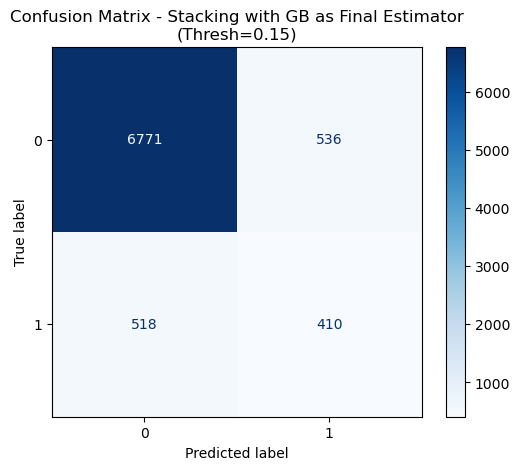

In [ ]:
from sklearn.ensemble import StackingClassifier

best_gb_key, best_gb_result = best_model_for('Gradient Boosting')
best_xgb_key, best_xgb_result = best_model_for('XGBoost')

gb_model = extract_trained_model(best_gb_result['pipeline'])
xgb_model = extract_trained_model(best_xgb_result['pipeline'])

stacking_clf = StackingClassifier(
    estimators=[('xgb', xgb_model)],
    final_estimator=gb_model,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

stacking_pipe = ImbPipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE(random_state=42)),
    ('classifier', stacking_clf)
])

stacking_pipe.fit(X_train, y_train)

y_proba = stacking_pipe.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

y_pred_best = (y_proba >= best_thresh).astype(int)

print(f"\n✅ StackingClassifier with SMOTE and Gradient Boosting as Final Estimator")
print(f"Best Threshold: {best_thresh:.2f} (F1 = {best_f1:.4f})")
print(classification_report(y_test, y_pred_best))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Stacking with GB as Final Estimator\n(Thresh={best_thresh:.2f})')
plt.grid(False)
plt.show()

b. Undersampling Method


✅ StackingClassifier with TomekLinks Undersampling
Best Threshold: 0.26 (F1 = 0.5285)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7307
           1       0.48      0.59      0.53       928

    accuracy                           0.88      8235
   macro avg       0.71      0.75      0.73      8235
weighted avg       0.89      0.88      0.89      8235

ROC AUC Score: 0.8108
AUC PR Score: 0.4817


<Figure size 600x500 with 0 Axes>

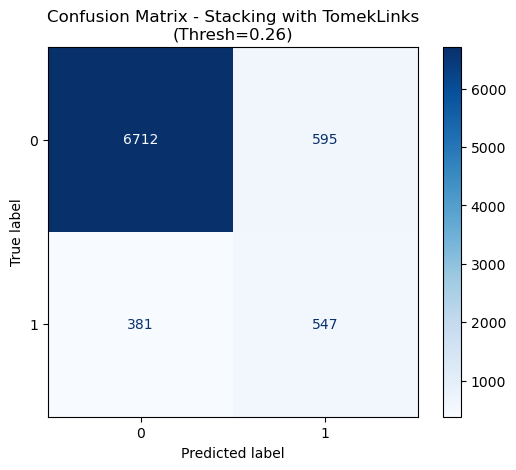

In [ ]:
best_gb_key, best_gb_result = best_model_for('Gradient Boosting')
best_xgb_key, best_xgb_result = best_model_for('XGBoost')

gb_model = extract_trained_model(best_gb_result['pipeline'])
xgb_model = extract_trained_model(best_xgb_result['pipeline'])

best_undersampler_name = best_gb_key[0]
best_undersampler = undersamplers[best_undersampler_name]

stacking_clf = StackingClassifier(
    estimators=[('gb', gb_model), ('xgb', xgb_model)],
    final_estimator=GradientBoostingClassifier(random_state=42),
    passthrough=True,
    cv=5,
    n_jobs=-1
)

stacking_pipe = ImbPipeline([
    ('preprocessing', transformer),
    ('undersample', best_undersampler),
    ('classifier', stacking_clf)
])

stacking_pipe.fit(X_train, y_train)

y_proba = stacking_pipe.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

y_pred_best = (y_proba >= best_thresh).astype(int)

print(f"\n✅ StackingClassifier with {best_undersampler_name} Undersampling")
print(f"Best Threshold: {best_thresh:.2f} (F1 = {best_f1:.4f})")
print(classification_report(y_test, y_pred_best))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print(f"AUC PR Score: {average_precision_score(y_test, y_proba):.4f}")

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Stacking with {best_undersampler_name}\n(Thresh={best_thresh:.2f})')
plt.grid(False)
plt.show()


#### Final Verdict

XGB

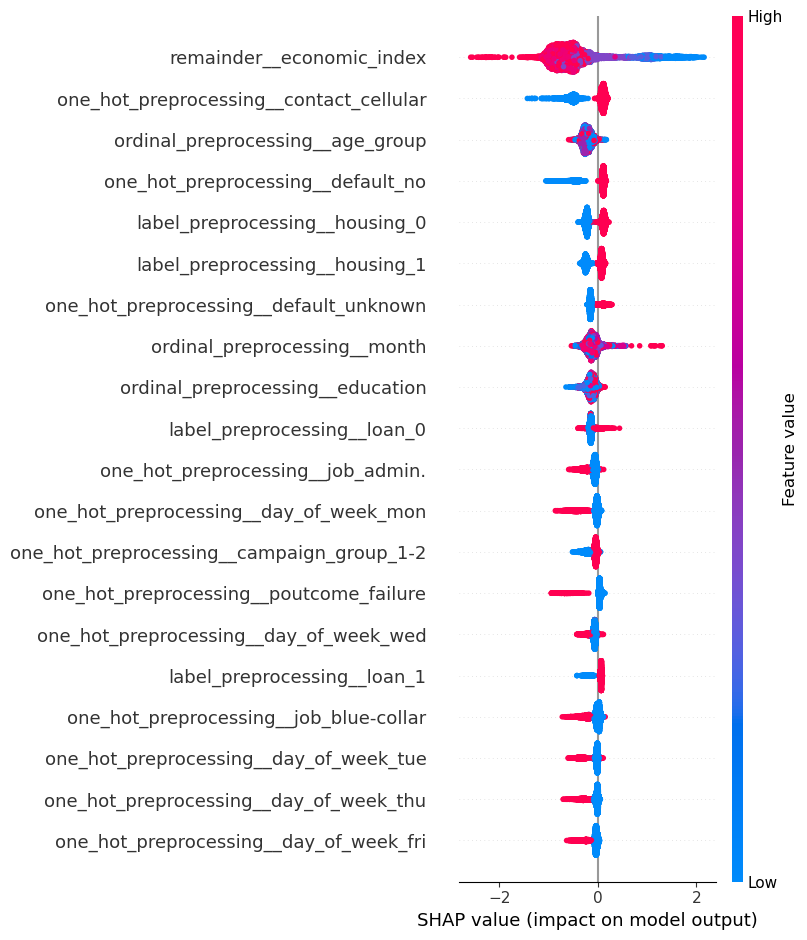

In [ ]:
import shap

best_xgb = best_params["XGBoost"].best_estimator_
trained_xgb = best_xgb.named_steps["classifier"]
X_test_transformed = best_xgb.named_steps["preprocessing"].transform(X_test)
feature_names = best_xgb.named_steps["preprocessing"].get_feature_names_out()

explainer = shap.Explainer(trained_xgb)
shap_values = explainer(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


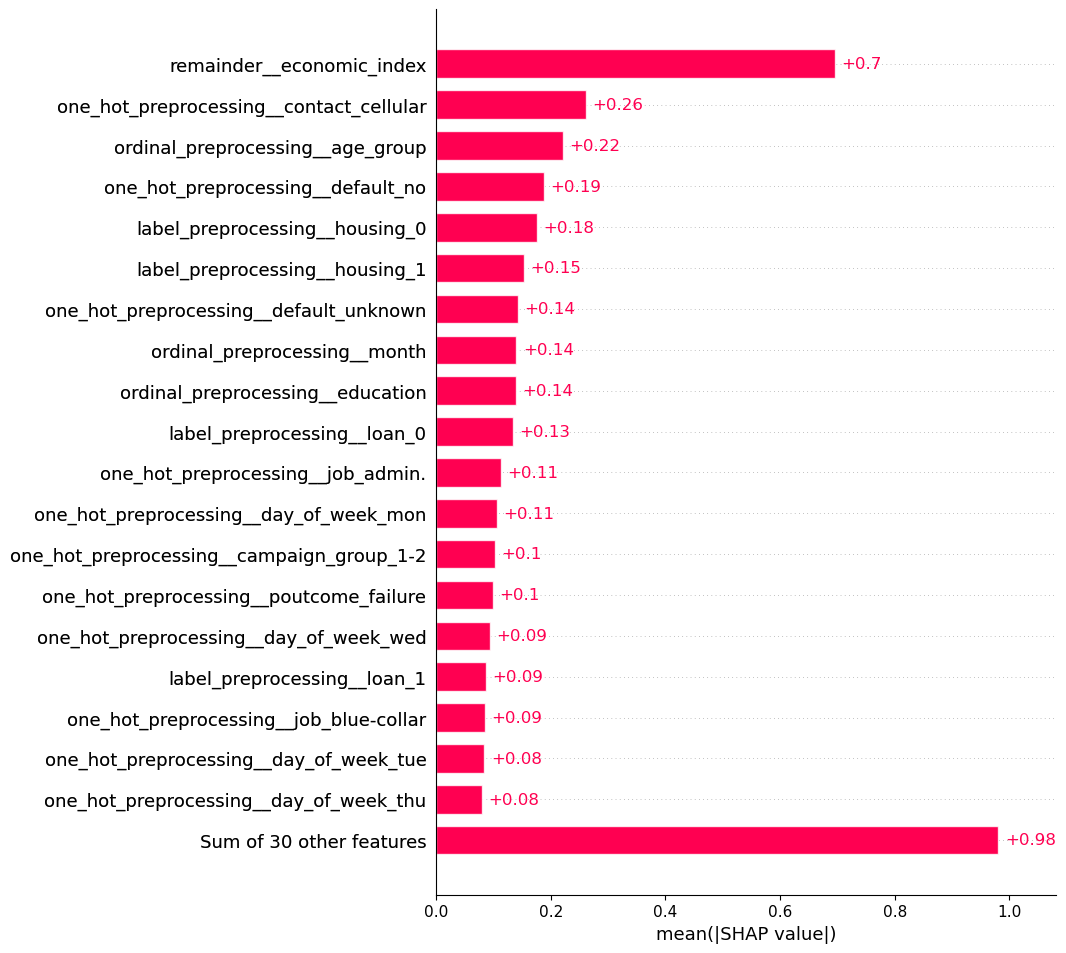

In [ ]:
import shap

explanation = shap.Explanation(
    values=shap_values.values,
    base_values=shap_values.base_values,
    data=X_test_transformed,
    feature_names=feature_names
)

shap.plots.bar(explanation, max_display=20)


In [ ]:
# Evaluate performance for each segment

segment_df = X_test.copy()
segment_df = segment_df.reset_index(drop=True) 
segment_df["y_true"] = y_test.reset_index(drop=True)
segment_df["y_pred"] = y_pred_best  
segment_df["y_proba"] = y_proba   
segments = ["age_group", "month", "contact"]

for segment in segments:
    print(f"\n🔍 Segment: {segment}")
    for val in segment_df[segment].dropna().unique(): 
        sub_df = segment_df[segment_df[segment] == val]
        if len(sub_df) == 0:
            continue
        precision = precision_score(sub_df["y_true"], sub_df["y_pred"], zero_division=0)
        recall = recall_score(sub_df["y_true"], sub_df["y_pred"], zero_division=0)
        f1 = f1_score(sub_df["y_true"], sub_df["y_pred"], zero_division=0)
        print(f"{str(val):<15} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")



🔍 Segment: age_group
Middle Age
(30-40) | Precision: 0.58 | Recall: 0.49 | F1: 0.53
Old Adults
(40-60) | Precision: 0.47 | Recall: 0.44 | F1: 0.45
Young Adults
(17-30) | Precision: 0.45 | Recall: 0.66 | F1: 0.54
Elders
(60+)    | Precision: 0.48 | Recall: 0.90 | F1: 0.63

🔍 Segment: month
jun             | Precision: 0.48 | Recall: 0.64 | F1: 0.55
jul             | Precision: 0.51 | Recall: 0.30 | F1: 0.38
apr             | Precision: 0.47 | Recall: 0.75 | F1: 0.58
aug             | Precision: 0.42 | Recall: 0.53 | F1: 0.47
may             | Precision: 0.48 | Recall: 0.18 | F1: 0.26
nov             | Precision: 0.63 | Recall: 0.54 | F1: 0.58
oct             | Precision: 0.53 | Recall: 0.95 | F1: 0.68
mar             | Precision: 0.54 | Recall: 0.85 | F1: 0.66
sep             | Precision: 0.51 | Recall: 0.85 | F1: 0.63
dec             | Precision: 0.54 | Recall: 0.81 | F1: 0.65

🔍 Segment: contact
telephone       | Precision: 0.49 | Recall: 0.21 | F1: 0.30
cellular        | Precision: 

In [ ]:
# Campaign Evaluation

contact_cost = 1
conversion_reward = 100

predicted_positive = segment_df[segment_df["y_pred"] == 1]

true_positives = predicted_positive[predicted_positive["y_true"] == 1]

false_positives = predicted_positive[predicted_positive["y_true"] == 0]

total_cost = len(predicted_positive) * contact_cost
total_gain = len(true_positives) * conversion_reward
net_profit = total_gain - total_cost

print(f"📊 Campaign Evaluation\n")
print(f"Total contacted       : {len(predicted_positive)}")
print(f"True conversions      : {len(true_positives)}")
print(f"False positives       : {len(false_positives)}")
print(f"Campaign Cost         : ${total_cost}")
print(f"Campaign Gain         : ${total_gain}")
print(f"Net Profit            : ${net_profit}")

📊 Campaign Evaluation

Total contacted       : 1021
True conversions      : 508
False positives       : 513
Campaign Cost         : $1021
Campaign Gain         : $50800
Net Profit            : $49779


In [ ]:
# Case: With model — contact everyone

contact_cost = 1
conversion_reward = 10

n_total = len(y_test)
n_actual_positive = sum(y_test == 1)

baseline_conversion_rate = n_actual_positive / n_total
cost_all = n_total * contact_cost
gain_all = n_actual_positive * conversion_reward
net_all = gain_all - cost_all

print("📉 Baseline Strategy (Contact Everyone)\n")
print(f"Total contacted       : {n_total}")
print(f"True conversions      : {n_actual_positive}")
print(f"Conversion rate       : {baseline_conversion_rate:.2%}")
print(f"Campaign Cost         : ${cost_all}")
print(f"Campaign Gain         : ${gain_all}")
print(f"Net Profit            : ${net_all}")

📉 Baseline Strategy (Contact Everyone)

Total contacted       : 8235
True conversions      : 928
Conversion rate       : 11.27%
Campaign Cost         : $8235
Campaign Gain         : $9280
Net Profit            : $1045


In [ ]:
# Case: With model — contact only predicted positives

predicted_positive = y_pred_best == 1 
n_pred_positive = predicted_positive.sum()
n_true_positive = ((y_pred_best == 1) & (y_test == 1)).sum()

cost_model = n_pred_positive * contact_cost
gain_model = n_true_positive * conversion_reward
net_model = gain_model - cost_model

improvement = net_model - net_all

# Report
print("📊 Campaign ROI Comparison\n")
print(f"➡️ Without Model: Net Profit = ${net_all}")
print(f"✅ With Model   : Net Profit = ${net_model}")
print(f"📈 Improvement  : ${improvement}")

📊 Campaign ROI Comparison

➡️ Without Model: Net Profit = $1045
✅ With Model   : Net Profit = $4059
📈 Improvement  : $3014


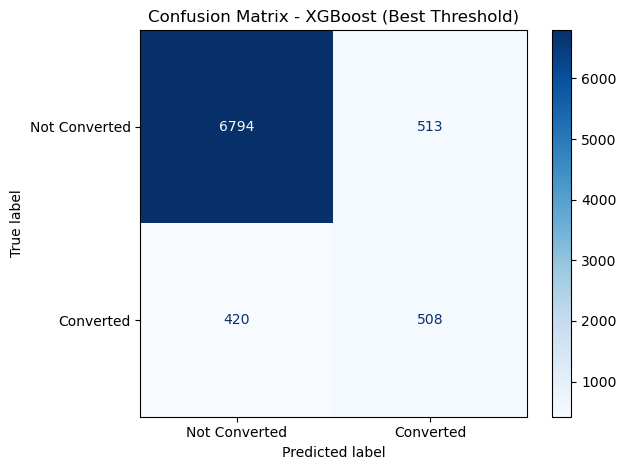

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
labels = ["Not Converted", "Converted"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - XGBoost (Best Threshold)")
plt.grid(False)
plt.tight_layout()
plt.show()

## 👁️ SUMMARY

#### 1.Data Exploration & Preprocessing
- Analyzed client demographic, campaign interaction, and economic data.
- Addressed class imbalance using SMOTE (Synthetic Minority Over-sampling Technique) and compared it with undersampling.
- Applied feature engineering and encoding were.

#### 2. Model Development
Multiple models were trained aswell as models tuning effort using threshold and different parameters to optimized F1-Score and Recall.

#### 3. Model Selection
Final Model : **XGBoost with SMOTE + threshold and parameters tuning
Chosen due to :
- Highest recall and F1-score
- Best true positive capture rate
- Balanced performance and interpretability
- Simpler than voting/stacking ensembles

#### 4. Campaign Impact Simulation 
Using the XGBoost + SMOTE model, only 1,021 high-probability customers were contacted, resulting in 508 conversions and a net profit of $49,779 (assuming $100 reward per conversion). In comparison, contacting all 8,235 customers led to only $1,045 in profit with a $10 reward per conversion. Even under the same $10 reward scenario, the model still achieved a net profit of $4,059, showing a 3x improvement over the baseline while significantly reducing outreach costs.

## 📊 Stakeholder Insights Report

### 1. What kinds of clients are more likely to do deposits?

**Demographics:**
- **Older clients (60+)** and **Young Adults (17–30)** have higher subscription rates.
- Certain **job categories** like `student`, `retired`, and `unemployed` show higher conversions.

**Financial Status:**
- Clients from a weaker labor market (lower `emp.var.rate`, lower `nr.employed`) are more likely to subscribe.
- Lower `euribor3m` and `cons.price.idx` values are also associated with higher deposit likelihood.

**Past Interactions:**
- Fewer contacts are better: high `campaign` values show diminishing returns.
---

### 2. How to personalize campaigns or decide whom to target?

**Predictive Modeling:**
- A trained **XGBoost classifier** predicts subscription likelihood.
- Model scores can rank customers by conversion probability.

**Segmentation-Based Targeting:**
- **Age and job-based personalization**:
  - Elders prefer security-oriented messaging.
  - Young Adults may respond to flexible or digital-first products.
- **Contact method matters**:
  - `Cellular` contacts perform significantly better than `telephone`.

---

### 3. How to allocate marketing efforts more efficiently?

**Timing:**
- Highest subscription rates occur in **March, September, October** — prioritize campaigns in these months.

**Channel Strategy:**
- Focus on **cellular outreach** over telephone for better results.

**Campaign Simulation:**
- **Without Model**: Blanket outreach leads to low efficiency and high costs.
- **With Model**:
  - Filter top 30–50% of leads by predicted probability.
  - Result: Higher conversion rate, lower cost per acquisition, improved ROI.

---

✅ **Recommendation:**
Integrate the ML model into the marketing pipeline to prioritize high-probability leads. Use insights from SHAP and segment analysis to personalize messaging and improve conversion rates by targeting the right people at the right time, through the right channel.